In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from collections import namedtuple
import seaborn as sns
import json

# データの定義

In [2]:
Row = namedtuple('Row', [
    'no',
    'region',
    'house_type',
    'structure',
    'upper_ins_type',
    'lower_ins_type',
    'upper_u',
    'wall_u',
    'lower_u',
    'base_psi_outside',
    'base_psi_inside',
    'window_u',
    'window_attachment_u',
    'window_eta',
    'window_attachment_eta'])

# データの読み込み

In [3]:
df = pd.read_csv('db_evlp_spec.csv')

In [4]:
rows = []
for r in df.values:
    rows.append(
        Row(
            no=str(r[0]),
            region=int(r[1]),
            house_type=str(r[2]),
            structure=str(r[3]),
            upper_ins_type=str(r[4]),
            lower_ins_type=str(r[5]),
            upper_u=float(r[6]),
            wall_u=float(r[7]),
            lower_u=float(r[8]) if r[8] != '-' else None,
            base_psi_outside=float(r[9]),
            base_psi_inside=float(r[10]),
            window_u=float(r[11]),
            window_attachment_u=float(r[12]),
            window_eta=float(r[13]),
            window_attachment_eta=float(r[14])
        )
    )

# データの分類

本検討では、

- 寒冷地（1,2地域）
- 準寒冷地（3,4地域）
- 温暖地（5,6,7地域） ※7地域は工法等に配慮してここでは温暖地に分類した
- 蒸暑地（8地域）  

の4つのグループに分類して検討する。

In [5]:
group1 = [r for r in rows if r.region == 1 or r.region == 2]
group2 = [r for r in rows if r.region == 3 or r.region == 4]
group3 = [r for r in rows if r.region == 5 or r.region == 6 or r.region == 7]
group4 = [r for r in rows if r.region == 8]

# データのチェック

4グループを2x2のグラフで表示する。

In [6]:
def draw_graphs(make_value):
    
    fig = plt.figure(figsize=(12,7))
    
    ax1 = fig.add_subplot(2,2,1)
    ax1_hist, ax1_vins, _ = ax1.hist(make_value(group1))
    ax1.set_title('region 1, 2' + '   n = ' + str(len(make_value(group1))) )

    ax2 = fig.add_subplot(2,2,2)
    ax2_hist, ax2_vins, _ = ax2.hist(make_value(group2))
    ax2.set_title('region 3, 4' + '   n = ' + str(len(make_value(group2))) )

    ax3 = fig.add_subplot(2,2,3)
    ax3_hist, ax3_vins, _ = ax3.hist(make_value(group3))
    ax3.set_title('region 5, 6, 7' + '   n = ' + str(len(make_value(group3))) )
    
    ax4 = fig.add_subplot(2,2,4)
    ax4_hist, ax4_vins, _ = ax4.hist(make_value(group4))
    ax4.set_title('region 8' + '   n = ' + str(len(make_value(group4))) )
    
    plt.show()
    
#    print('region 1,2')
#    print('度数: ' + str(ax1_hist))
#    print('区切値: ' + str(ax1_vins))
#    print('region 3,4')
#    print('度数: ' + str(ax2_hist))
#    print('区切値: ' + str(ax2_vins))
#    print('region 5,6,7')
#    print('度数: ' + str(ax3_hist))
#    print('区切値: ' + str(ax3_vins))
#    print('region 8')
#    print('度数: ' + str(ax4_hist))
#    print('区切値: ' + str(ax4_vins))


## 上部のU値

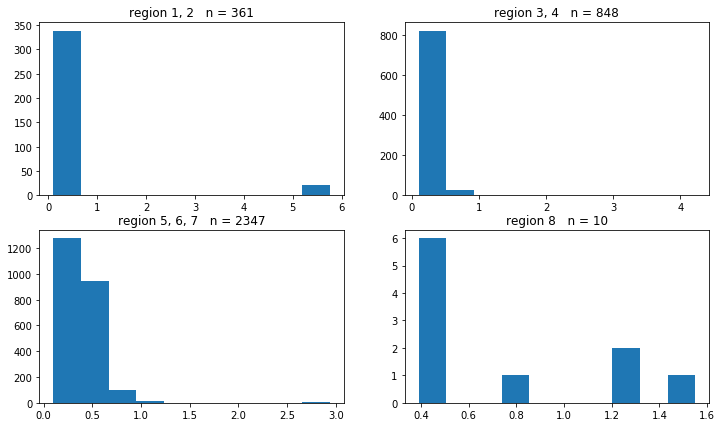

In [7]:
draw_graphs(lambda rows:[r.upper_u for r in rows])

## 外壁のU値

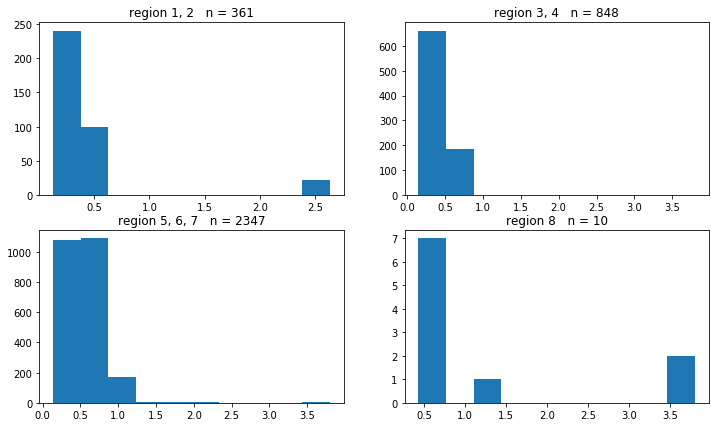

In [8]:
draw_graphs(lambda rows:[r.wall_u for r in rows])

## 下部のU値

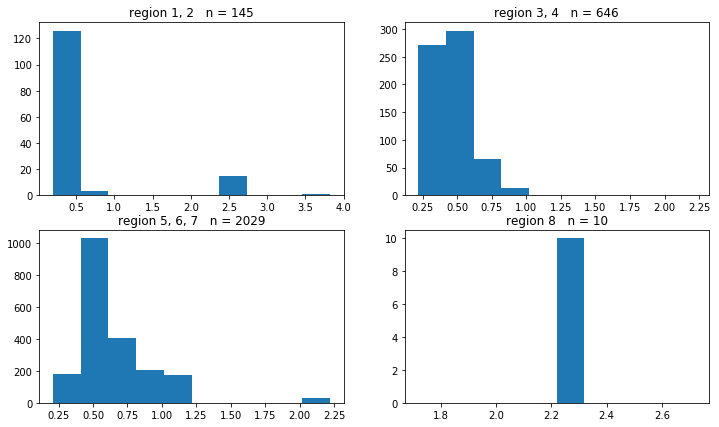

In [9]:
draw_graphs(lambda rows:[r.lower_u for r in rows if r.lower_ins_type == '床断熱'])

## 土間床外気側のψ値

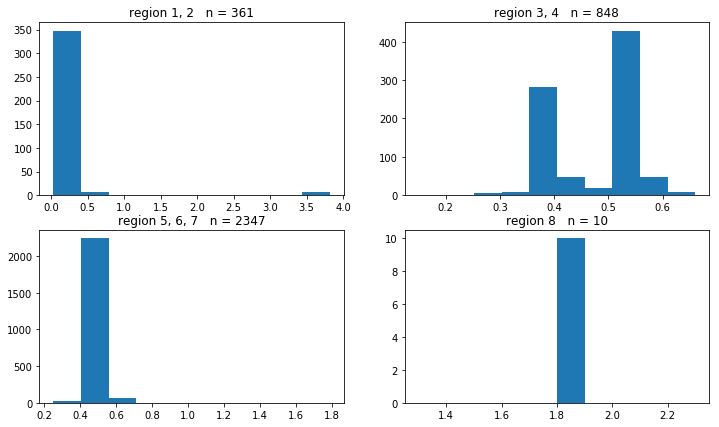

In [10]:
draw_graphs(lambda rows:[r.base_psi_outside for r in rows])

## 土間床床下側のψ値

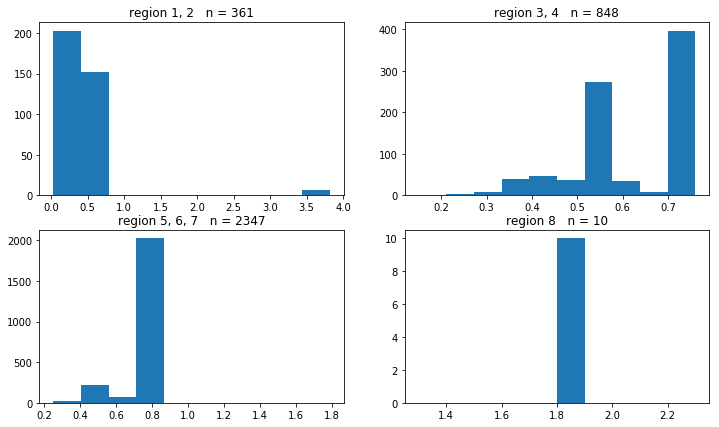

In [11]:
draw_graphs(lambda rows:[r.base_psi_inside for r in rows])

## 窓のU値

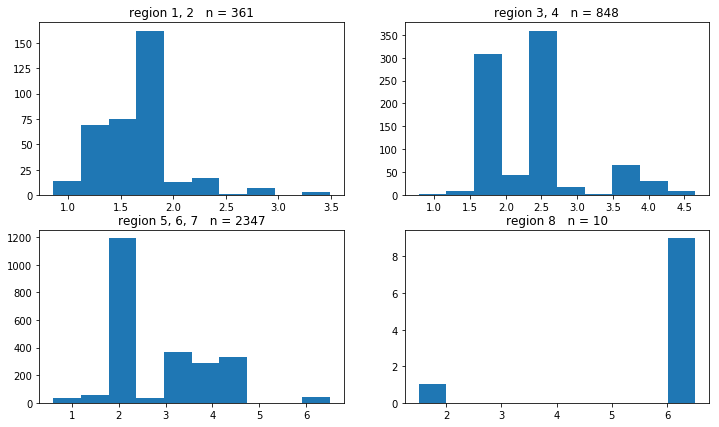

In [12]:
draw_graphs(lambda rows:[r.window_u for r in rows])

## 窓（障子）のU値

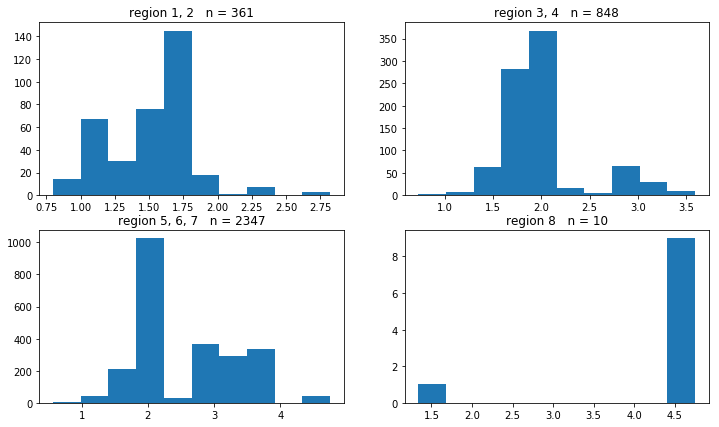

In [13]:
draw_graphs(lambda rows:[r.window_attachment_u for r in rows])

## 窓のη値

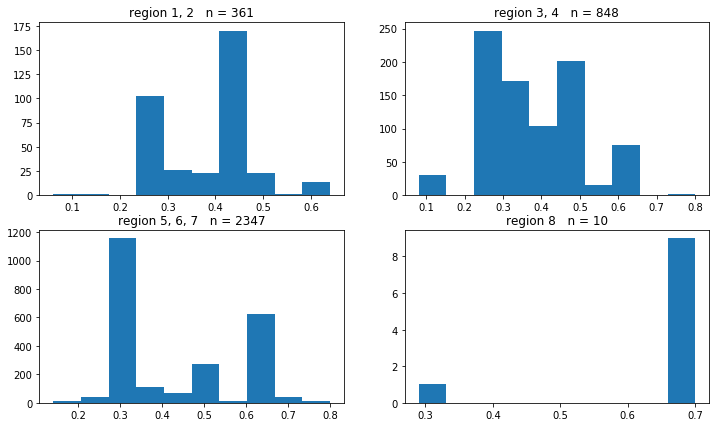

In [14]:
draw_graphs(lambda rows:[r.window_eta for r in rows])

## 窓（障子）のη値

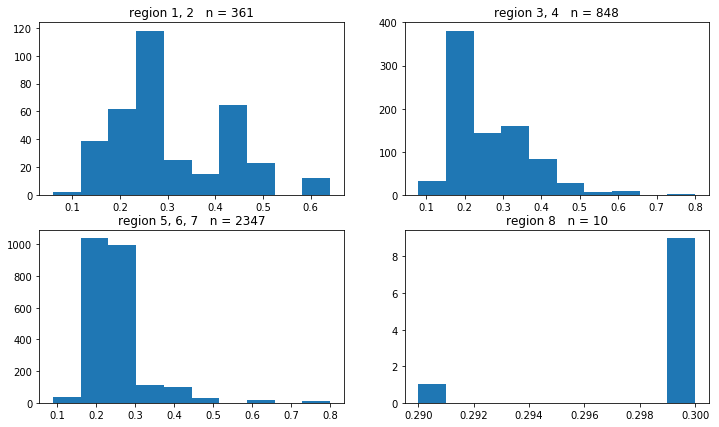

In [15]:
draw_graphs(lambda rows:[r.window_attachment_eta for r in rows])

# 対数関数の分布

## 上部のU値

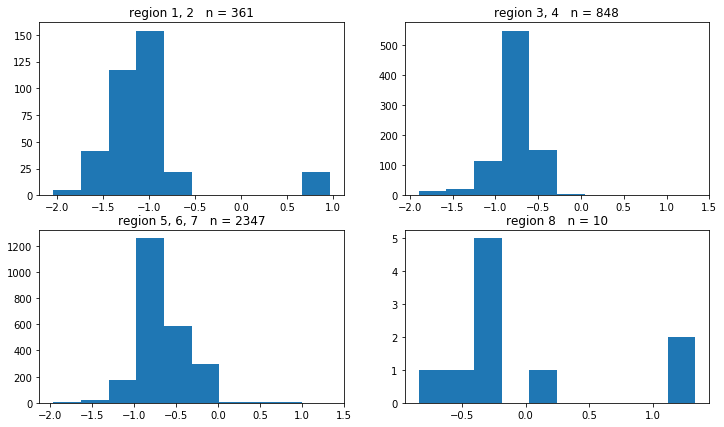

In [16]:
draw_graphs(lambda rows:[np.log(r.wall_u) for r in rows])

## 外壁のU値

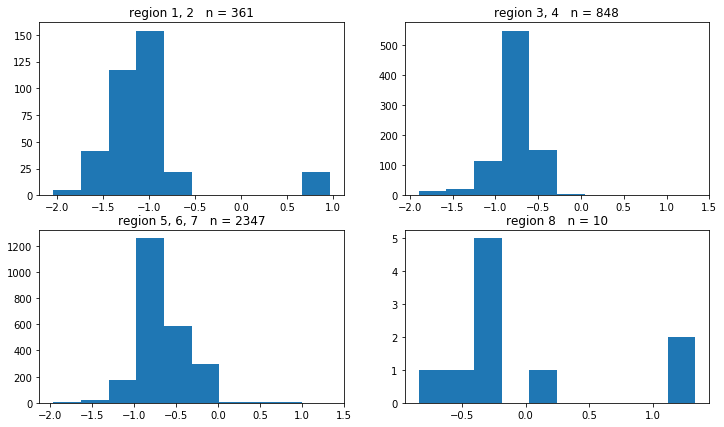

In [17]:
draw_graphs(lambda rows:[np.log(r.wall_u) for r in rows])

## 下部のU値

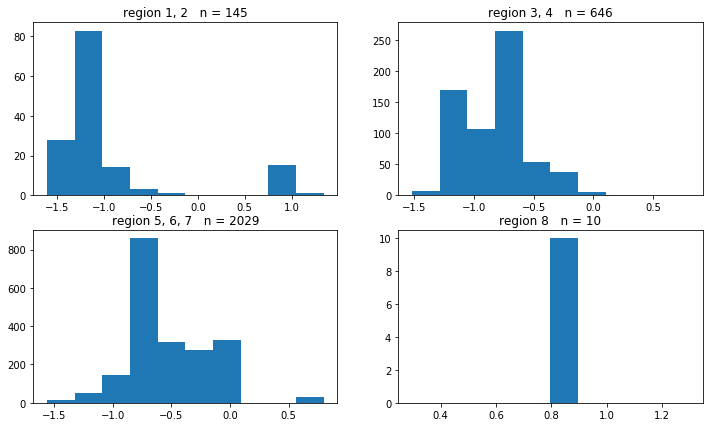

In [18]:
draw_graphs(lambda rows:[np.log(r.lower_u) for r in rows if r.lower_ins_type == '床断熱'])

## 土間床外気側のψ値

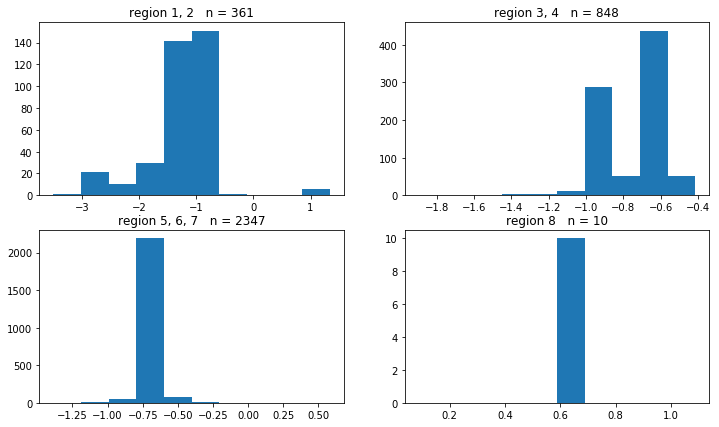

In [19]:
draw_graphs(lambda rows:[np.log(r.base_psi_outside) for r in rows])

## 土間床床下側のψ値

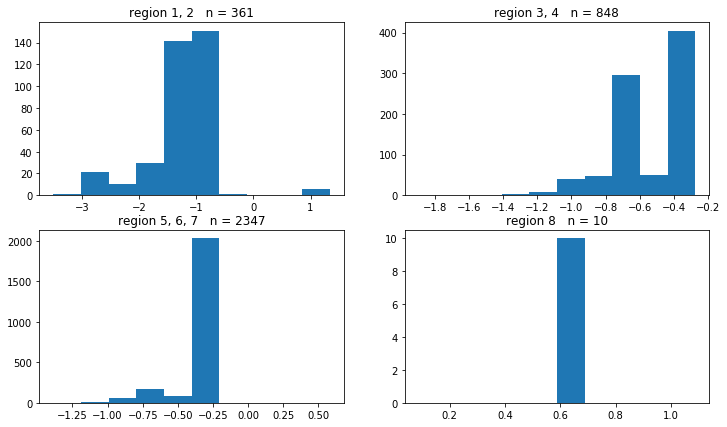

In [20]:
draw_graphs(lambda rows:[np.log(r.base_psi_inside) for r in rows])

## 窓のU値

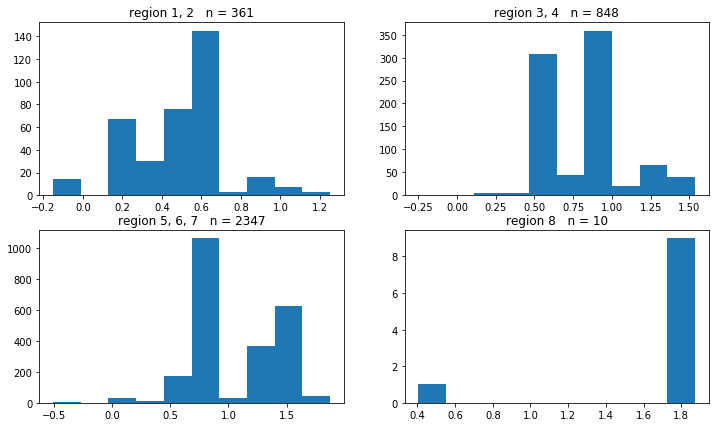

In [21]:
draw_graphs(lambda rows:[np.log(r.window_u) for r in rows])

## 窓（障子）のU値

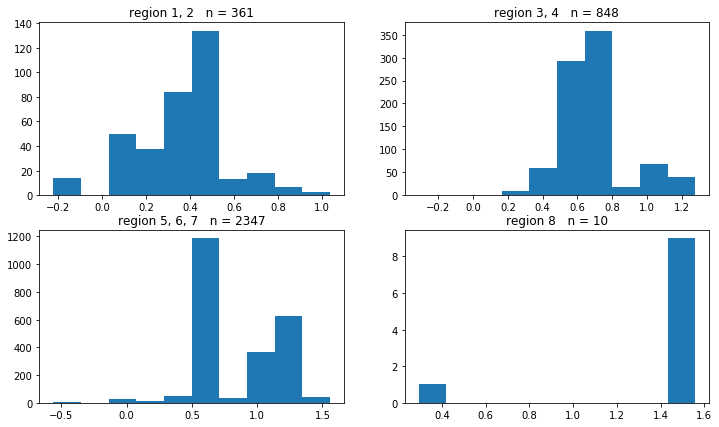

In [22]:
draw_graphs(lambda rows:[np.log(r.window_attachment_u) for r in rows])

## 窓のη値

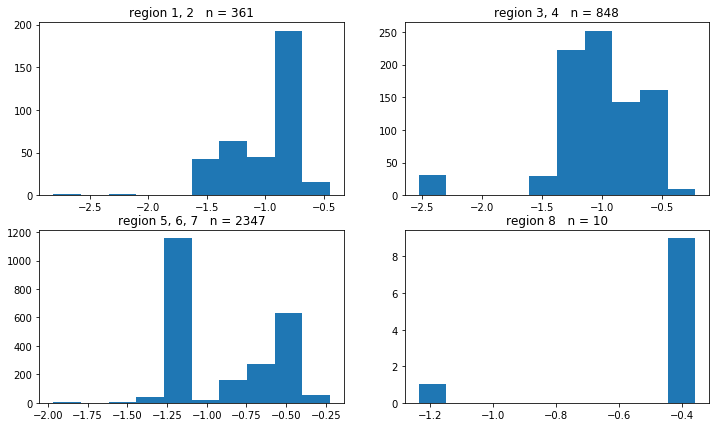

In [23]:
draw_graphs(lambda rows:[np.log(r.window_eta) for r in rows])

## 窓（障子）のη値

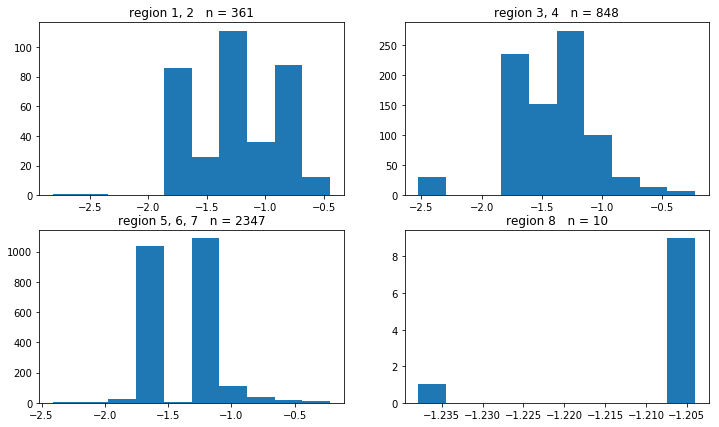

In [24]:
draw_graphs(lambda rows:[np.log(r.window_attachment_eta) for r in rows])

# 対数関数の平均と分散

In [25]:
Prop = namedtuple('Prop', [
    'average',
    'std',
    'var'
])

In [26]:
def make_prop(d1, d2=None):
    if d2 is None:
        d_anlz = np.log(d1)
    else:
        d_anlz = np.log(d2)
    average = np.average(d_anlz)
    std = np.std(d_anlz)
    var = np.var(d_anlz)
    stat = np.exp(np.random.normal(average, std, 10000))
    real = d1
    plt.figure()
    plt.hist(real, alpha=0.3, histtype='stepfilled', color='r', density=True, bins=50, label='real')
    plt.hist(stat, alpha=0.3, histtype='stepfilled', color='b', density=True, bins=50, label='estimated')
    plt.legend()
    plt.show()
    
    print('平均: ' + str(average))
    print('分散: ' + str(var))
    
    return Prop(
        average = average,
        std = std,
        var = var
    )

## 上部のU値

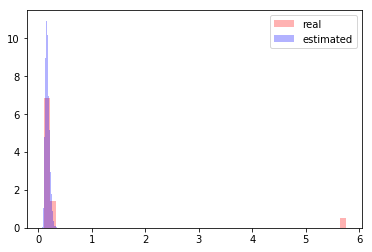

平均: -1.7810286755122835
分散: 0.049601585910625474


In [27]:
upper_u_prop_gp1 = make_prop(d1=[r.upper_u for r in group1], d2=[r.upper_u for r in group1 if r.upper_u < 2.5])

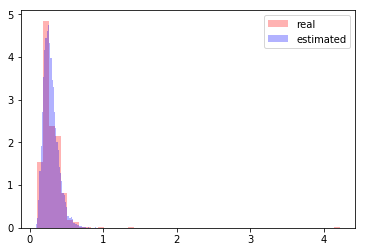

平均: -1.2869929837805447
分散: 0.11259976182369295


In [28]:
upper_u_prop_gp2 = make_prop(d1=[r.upper_u for r in group2], d2=[r.upper_u for r in group2 if r.upper_u < 2.5])

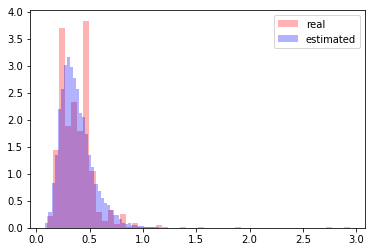

平均: -1.0506588694647474
分散: 0.15129699260650045


In [29]:
upper_u_prop_gp3 = make_prop(d1=[r.upper_u for r in group3], d2=[r.upper_u for r in group3 if r.upper_u < 2.5])

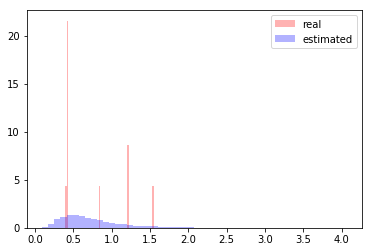

平均: -0.44998556300543824
分散: 0.272473378710761


In [30]:
upper_u_prop_gp4 = make_prop(d1=[r.upper_u for r in group4], d2=[r.upper_u for r in group4 if r.upper_u < 2.5])

## 外壁のU値

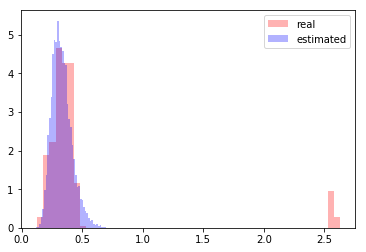

平均: -1.1342760222904817
分散: 0.061759648191812504


In [31]:
wall_u_prop_gp1 = make_prop(d1=[r.wall_u for r in group1], d2=[r.wall_u for r in group1 if r.wall_u<2.0])

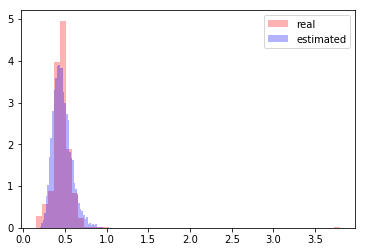

平均: -0.7937772725969426
分散: 0.05413109854665567


In [32]:
wall_u_prop_gp2 = make_prop(d1=[r.wall_u for r in group2], d2=[r.wall_u for r in group2 if r.wall_u<2.0])

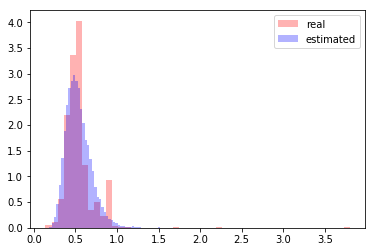

平均: -0.6571959537509707
分散: 0.07265996701922202


In [33]:
wall_u_prop_gp3 = make_prop(d1=[r.wall_u for r in group3], d2=[r.wall_u for r in group3 if r.wall_u<2.0])

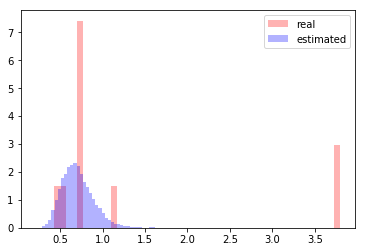

平均: -0.38126994205393355
分散: 0.06828450907357964


In [34]:
wall_u_prop_gp4 = make_prop(d1=[r.wall_u for r in group4], d2=[r.wall_u for r in group4 if r.wall_u<2.0])

## 下部のU値

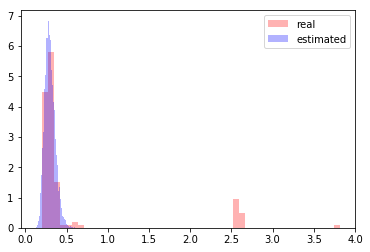

平均: -1.2321375674943118
分散: 0.04516462620124811


In [35]:
lower_u_prop_gp1 = make_prop(d1=[r.lower_u for r in group1 if r.lower_ins_type == '床断熱'],
                            d2=[r.lower_u for r in group1 if r.lower_ins_type == '床断熱' and r.lower_u < 1.5])

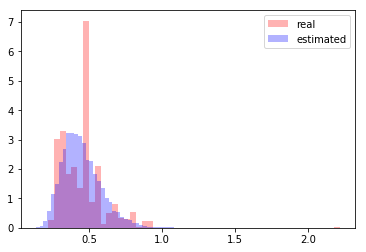

平均: -0.8345103488486879
分散: 0.0868355589618928


In [36]:
lower_u_prop_gp2 = make_prop(d1=[r.lower_u for r in group2 if r.lower_ins_type == '床断熱'])

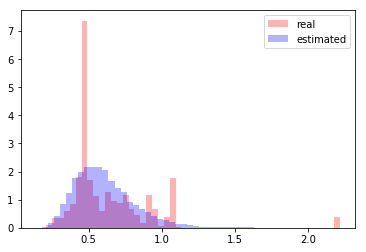

平均: -0.546482008270393
分散: 0.11108388912732604


In [37]:
lower_u_prop_gp3 = make_prop(d1=[r.lower_u for r in group3 if r.lower_ins_type == '床断熱'],
                            d2=[r.lower_u for r in group3 if r.lower_ins_type == '床断熱' and r.lower_u < 1.5])

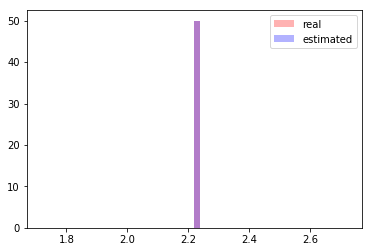

平均: 0.7975071958841882
分散: 0.0


In [38]:
lower_u_prop_gp4 = make_prop(d1=[r.lower_u for r in group4 if r.lower_ins_type == '床断熱'])

## 土間床外気側のψ値

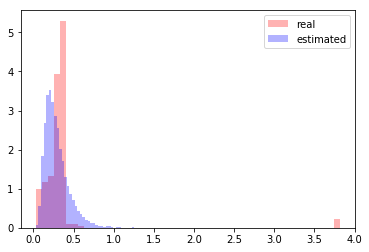

平均: -1.3517255378280724
分散: 0.25464497468859426


In [39]:
base_psi_outside_prop_gp1 = make_prop(d1=[r.base_psi_outside for r in group1],
                                      d2=[r.base_psi_outside for r in group1 if r.base_psi_outside <= 1.8])

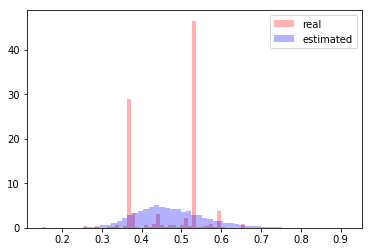

平均: -0.7714898525185759
分散: 0.0345184279870698


In [40]:
base_psi_outside_prop_gp2 = make_prop(d1=[r.base_psi_outside for r in group2])

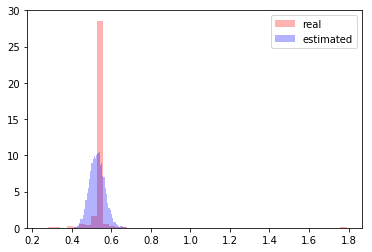

平均: -0.6393662690088232
分散: 0.005187098083574258


In [41]:
base_psi_outside_prop_gp3 = make_prop(d1=[r.base_psi_outside for r in group3])

C:\Users\miura\Anaconda3\lib\site-packages\numpy\lib\function_base.py:838: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\miura\Anaconda3\lib\site-packages\numpy\lib\function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


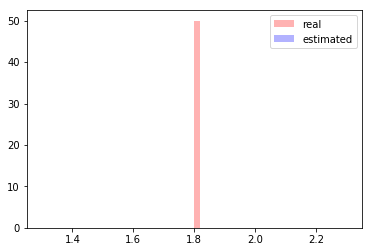

平均: 0.587786664902119
分散: 1.232595164407831e-32


In [42]:
base_psi_outside_prop_gp4 = make_prop(d1=[r.base_psi_outside for r in group4])

## 土間床床下側のψ値

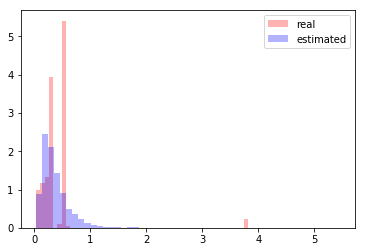

平均: -1.2049389740769594
分散: 0.3907944983385529


In [43]:
base_psi_inside_prop_gp1 = make_prop(d1=[r.base_psi_inside for r in group1],
                                     d2=[r.base_psi_inside for r in group1 if r.base_psi_inside <= 1.8])

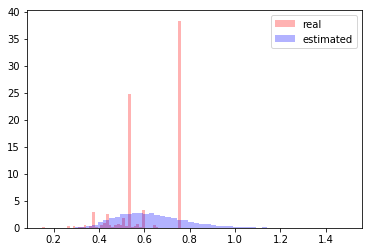

平均: -0.4972217244059022
分散: 0.05713181044803758


In [44]:
base_psi_inside_prop_gp2 = make_prop(d1=[r.base_psi_inside for r in group2])

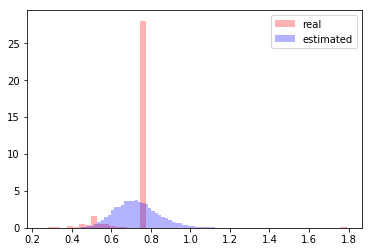

平均: -0.3277622692568486
分散: 0.023091772479116757


In [45]:
base_psi_inside_prop_gp3 = make_prop(d1=[r.base_psi_inside for r in group3])

C:\Users\miura\Anaconda3\lib\site-packages\numpy\lib\function_base.py:838: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\miura\Anaconda3\lib\site-packages\numpy\lib\function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


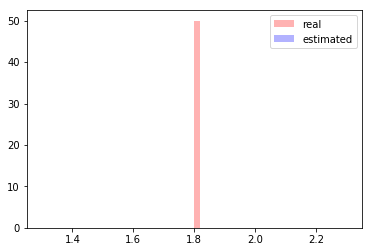

平均: 0.587786664902119
分散: 1.232595164407831e-32


In [46]:
base_psi_inside_prop_gp4 = make_prop(d1=[r.base_psi_inside for r in group4])

## 窓のU値

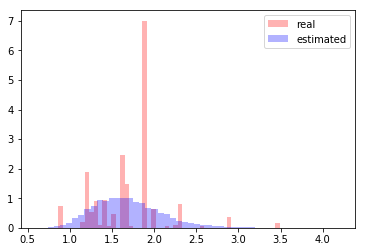

平均: 0.5025948019843093
分散: 0.057915427300458074


In [47]:
window_u_prop_gp1 = make_prop(d1=[r.window_u for r in group1])

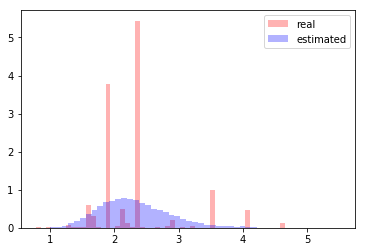

平均: 0.8132524442499469
分散: 0.05602339336709739


In [48]:
window_u_prop_gp2 = make_prop(d1=[r.window_u for r in group2])

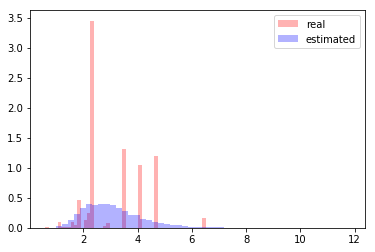

平均: 1.0617599621382345
分散: 0.12133895179353145


In [49]:
window_u_prop_gp3 = make_prop(d1=[r.window_u for r in group3])

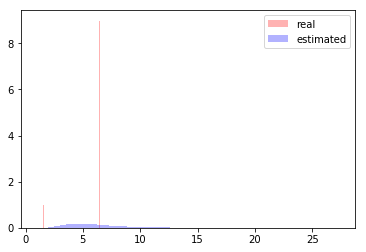

平均: 1.7265520214092465
分散: 0.19391895916615348


In [50]:
window_u_prop_gp4 = make_prop(d1=[r.window_u for r in group4])

## 窓（障子）のU値

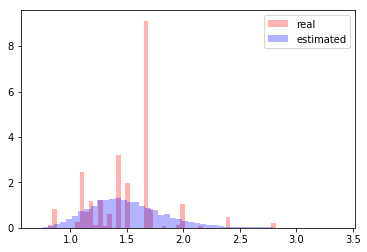

平均: 0.3795247460606462
分散: 0.04718851076698422


In [51]:
window_attachment_u_prop_gp1 = make_prop(d1=[r.window_attachment_u for r in group1])

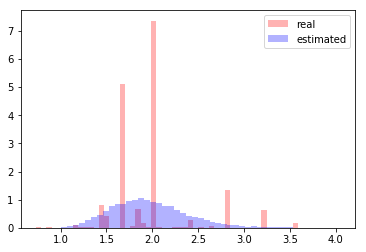

平均: 0.6568583791790515
分散: 0.04286682382093069


In [52]:
window_attachment_u_prop_gp2 = make_prop(d1=[r.window_attachment_u for r in group2])

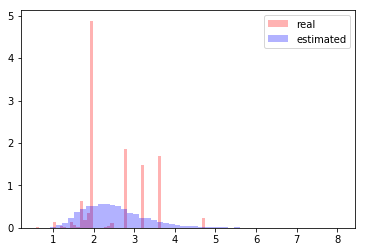

平均: 0.8715107714842325
分散: 0.09059507239607692


In [53]:
window_attachment_u_prop_gp3 = make_prop(d1=[r.window_attachment_u for r in group3])

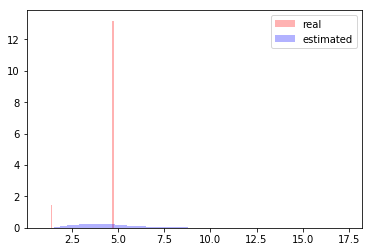

平均: 1.431597117638177
分散: 0.14412842873646448


In [54]:
window_attachment_u_prop_gp4 = make_prop(d1=[r.window_attachment_u for r in group4])

## 窓のη値

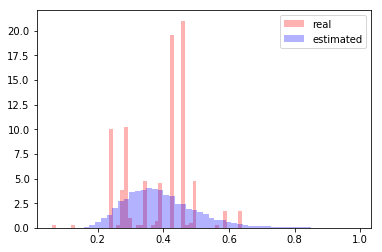

平均: -0.9796472373725341
分散: 0.07790274813827587


In [55]:
window_eta_gp1 = make_prop(d1=[r.window_eta for r in group1])

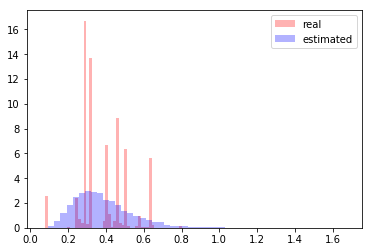

平均: -1.0308989201928813
分散: 0.15910514827012587


In [56]:
window_eta_gp2 = make_prop(d1=[r.window_eta for r in group2])

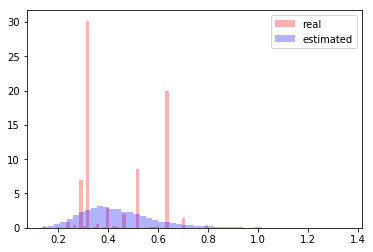

平均: -0.8814364800103955
分散: 0.10712442289277509


In [57]:
window_eta_gp3 = make_prop(d1=[r.window_eta for r in group3])

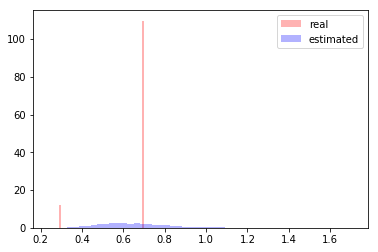

平均: -0.4447948851450209
分散: 0.06988611634379767


In [58]:
window_eta_gp4 = make_prop(d1=[r.window_eta for r in group4])

## 窓（障子）のη値

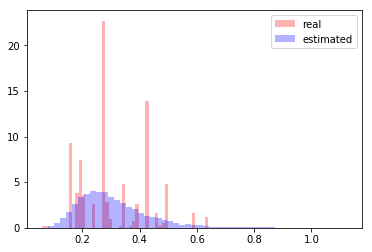

平均: -1.2587855684047227
分散: 0.149835242641928


In [59]:
window_attachment_eta_gp1 = make_prop(d1=[r.window_attachment_eta for r in group1])

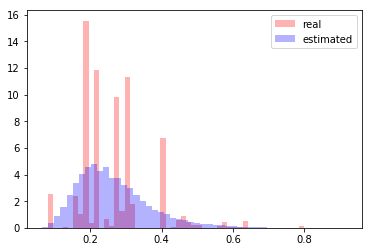

平均: -1.4048969417633737
分散: 0.13978167096665


In [60]:
window_attachment_eta_gp2 = make_prop(d1=[r.window_attachment_eta for r in group2])

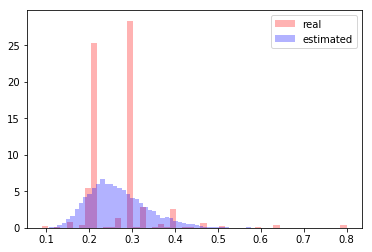

平均: -1.3512023629602814
分散: 0.06750366503241646


In [61]:
window_attachment_eta_gp3 = make_prop(d1=[r.window_attachment_eta for r in group3])

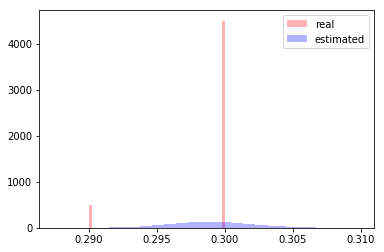

平均: -1.2073629594935043
分散: 0.00010343836854170016


In [62]:
window_attachment_eta_gp4 = make_prop(d1=[r.window_attachment_eta for r in group4])

# 対数関数の相関

## 相関グラフ

In [63]:
def draw_graphs(make_value):
    
    fig = plt.figure(figsize=(12,7))
    
    ax1 = fig.add_subplot(1,2,1)
    
    ax1_hist, ax1_vins, _ = ax1.hist(make_value(group1))
    ax1.set_title('region 1, 2' + '   n = ' + str(len(make_value(group1))) )

    ax2 = fig.add_subplot(2,2,2)
    ax2_hist, ax2_vins, _ = ax2.hist(make_value(group2))
    ax2.set_title('region 3, 4' + '   n = ' + str(len(make_value(group2))) )

    ax3 = fig.add_subplot(2,2,3)
    ax3_hist, ax3_vins, _ = ax3.hist(make_value(group3))
    ax3.set_title('region 5, 6, 7' + '   n = ' + str(len(make_value(group3))) )
    
    ax4 = fig.add_subplot(2,2,4)
    ax4_hist, ax4_vins, _ = ax4.hist(make_value(group4))
    ax4.set_title('region 8' + '   n = ' + str(len(make_value(group4))) )
    
    plt.show()

In [64]:
def make_corrcoef(ds1, ds2):
    
    corrcoef1 = np.corrcoef(ds1[0], ds1[1])[1][0]
    corrcoef2 = np.corrcoef(ds2[0], ds2[1])[1][0]
    
    fig = plt.figure(figsize=(14,4))
    
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(ds1[0], ds1[1], 'x')
    ax1.set_title('R = ' + str(corrcoef1))
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(ds2[0], ds2[1], 'x')
    ax2.set_title('R = ' + str(corrcoef2))
    
    plt.show()
    
    return corrcoef2

In [65]:
rows_filterd = [r for r in rows if r.upper_u < 2.5 and r.wall_u < 2.0]

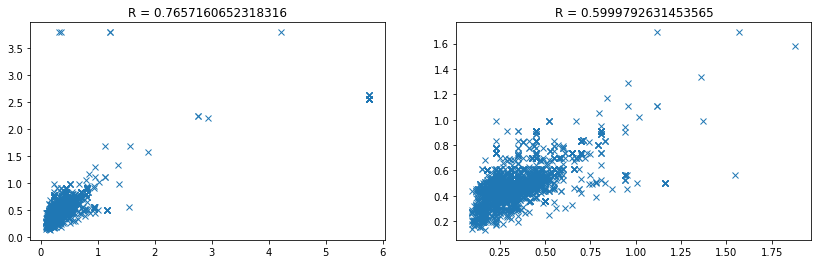

In [66]:
c12 = make_corrcoef(
    ds1=([r.upper_u for r in rows], [r.wall_u for r in rows]),
    ds2=([r.upper_u for r in rows_filterd], [r.wall_u for r in rows_filterd]))

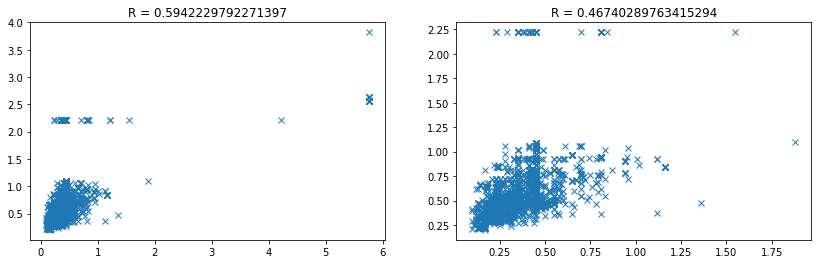

In [67]:
c13 = make_corrcoef(
    ds1=([r.upper_u for r in rows if r.lower_ins_type == '床断熱'], 
         [r.lower_u for r in rows if r.lower_ins_type == '床断熱']),
    ds2=([r.upper_u for r in rows_filterd if r.lower_ins_type == '床断熱'],
         [r.lower_u for r in rows_filterd if r.lower_ins_type == '床断熱']))

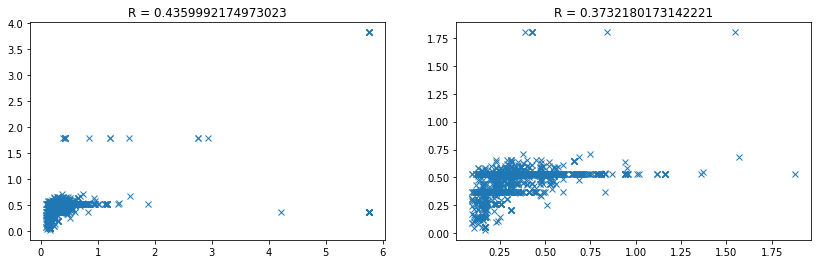

In [68]:
c14 = make_corrcoef(
    ds1=([r.upper_u for r in rows], [r.base_psi_outside for r in rows]),
    ds2=([r.upper_u for r in rows_filterd], [r.base_psi_outside for r in rows_filterd]))

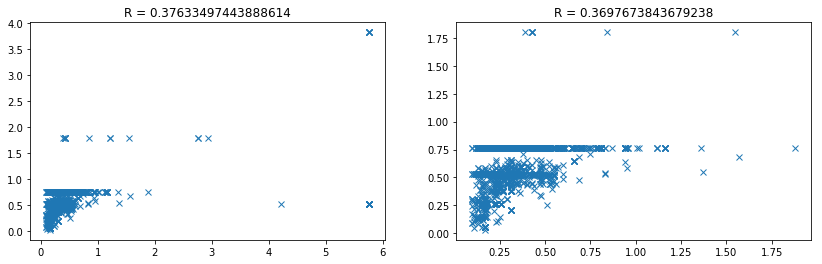

In [69]:
c15 = make_corrcoef(
    ds1=([r.upper_u for r in rows], [r.base_psi_inside for r in rows]),
    ds2=([r.upper_u for r in rows_filterd], [r.base_psi_inside for r in rows_filterd]))

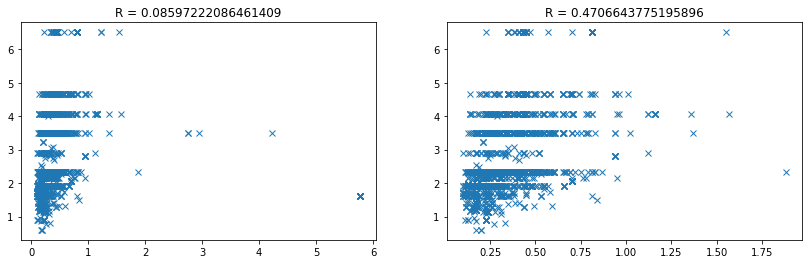

In [70]:
c16 = make_corrcoef(
    ds1=([r.upper_u for r in rows], [r.window_u for r in rows]),
    ds2=([r.upper_u for r in rows_filterd], [r.window_u for r in rows_filterd]))

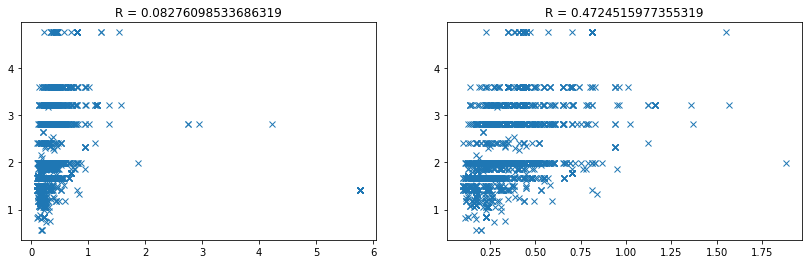

In [71]:
c17 = make_corrcoef(
    ds1=([r.upper_u for r in rows], [r.window_attachment_u for r in rows]),
    ds2=([r.upper_u for r in rows_filterd], [r.window_attachment_u for r in rows_filterd]))

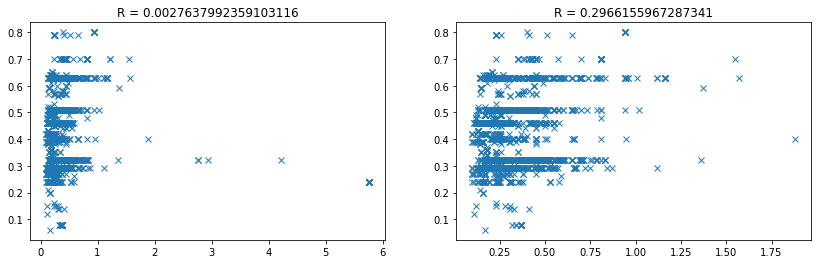

In [72]:
c18 = make_corrcoef(
    ds1=([r.upper_u for r in rows], [r.window_eta for r in rows]),
    ds2=([r.upper_u for r in rows_filterd], [r.window_eta for r in rows_filterd]))

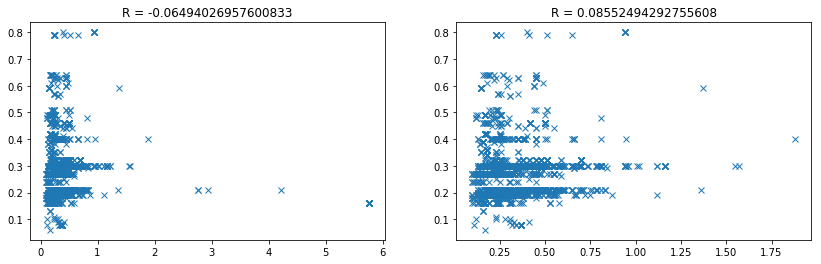

In [73]:
c19 = make_corrcoef(
    ds1=([r.upper_u for r in rows], [r.window_attachment_eta for r in rows]),
    ds2=([r.upper_u for r in rows_filterd], [r.window_attachment_eta for r in rows_filterd]))

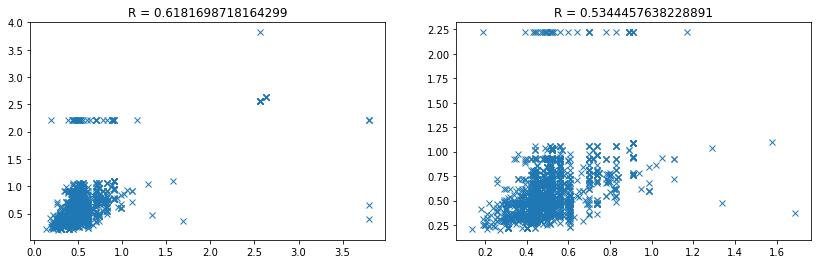

In [74]:
c23 = make_corrcoef(
    ds1=([r.wall_u for r in rows if r.lower_ins_type == '床断熱'], 
         [r.lower_u for r in rows if r.lower_ins_type == '床断熱']),
    ds2=([r.wall_u for r in rows_filterd if r.lower_ins_type == '床断熱'],
         [r.lower_u for r in rows_filterd if r.lower_ins_type == '床断熱']))

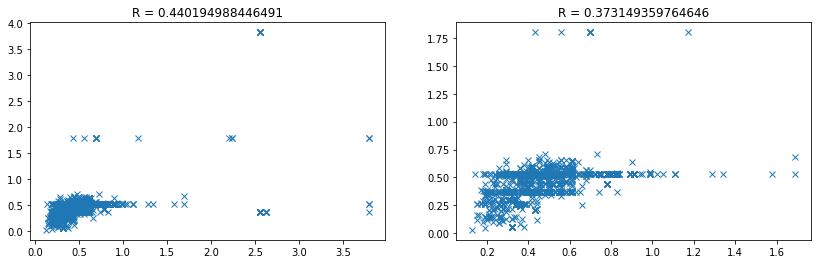

In [75]:
c24 = make_corrcoef(
    ds1=([r.wall_u for r in rows], [r.base_psi_outside for r in rows]),
    ds2=([r.wall_u for r in rows_filterd], [r.base_psi_outside for r in rows_filterd]))

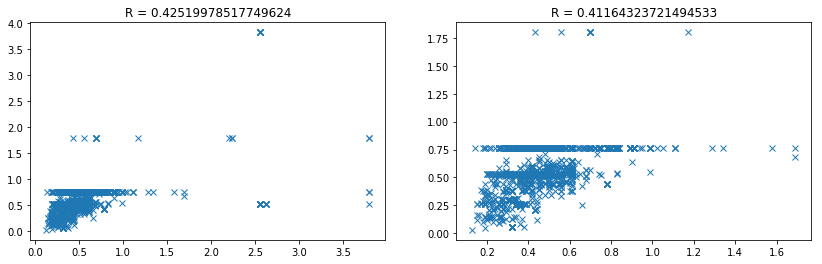

In [76]:
c25 = make_corrcoef(
    ds1=([r.wall_u for r in rows], [r.base_psi_inside for r in rows]),
    ds2=([r.wall_u for r in rows_filterd], [r.base_psi_inside for r in rows_filterd]))

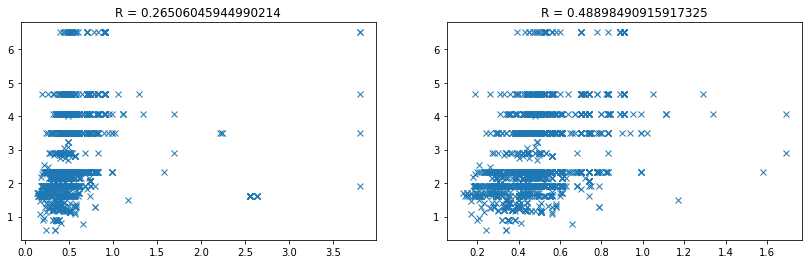

In [77]:
c26 = make_corrcoef(
    ds1=([r.wall_u for r in rows], [r.window_u for r in rows]),
    ds2=([r.wall_u for r in rows_filterd], [r.window_u for r in rows_filterd]))

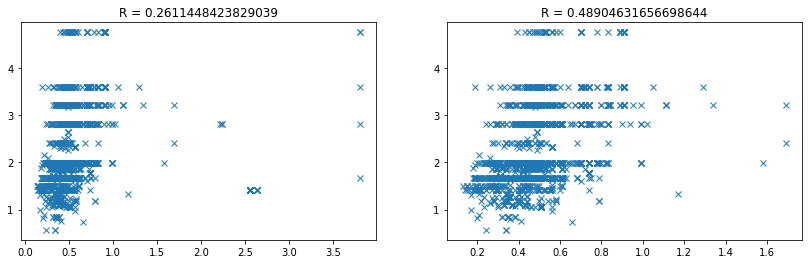

In [78]:
c27 = make_corrcoef(
    ds1=([r.wall_u for r in rows], [r.window_attachment_u for r in rows]),
    ds2=([r.wall_u for r in rows_filterd], [r.window_attachment_u for r in rows_filterd]))

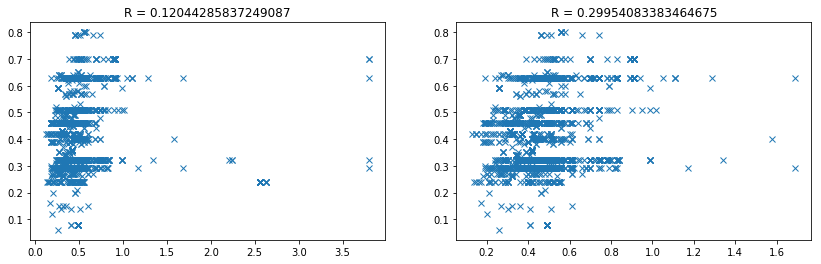

In [79]:
c28 = make_corrcoef(
    ds1=([r.wall_u for r in rows], [r.window_eta for r in rows]),
    ds2=([r.wall_u for r in rows_filterd], [r.window_eta for r in rows_filterd]))

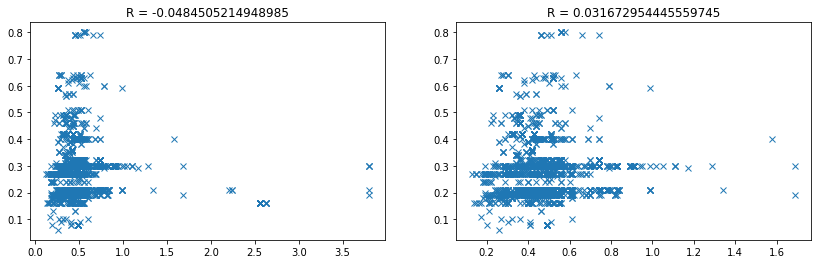

In [80]:
c29 = make_corrcoef(
    ds1=([r.wall_u for r in rows], [r.window_attachment_eta for r in rows]),
    ds2=([r.wall_u for r in rows_filterd], [r.window_attachment_eta for r in rows_filterd]))

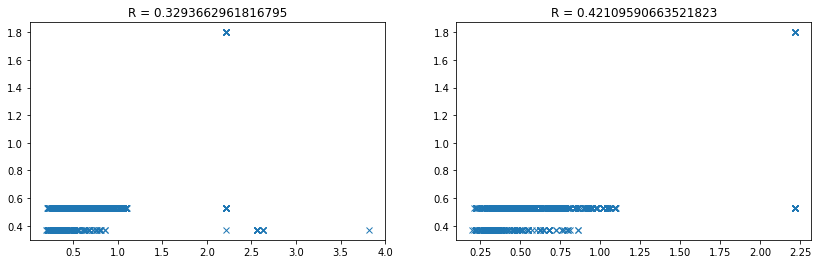

In [81]:
c34 = make_corrcoef(
    ds1=([r.lower_u for r in rows if r.lower_ins_type == '床断熱'], 
         [r.base_psi_outside for r in rows if r.lower_ins_type == '床断熱']),
    ds2=([r.lower_u for r in rows_filterd if r.lower_ins_type == '床断熱'],
         [r.base_psi_outside for r in rows_filterd if r.lower_ins_type == '床断熱']))

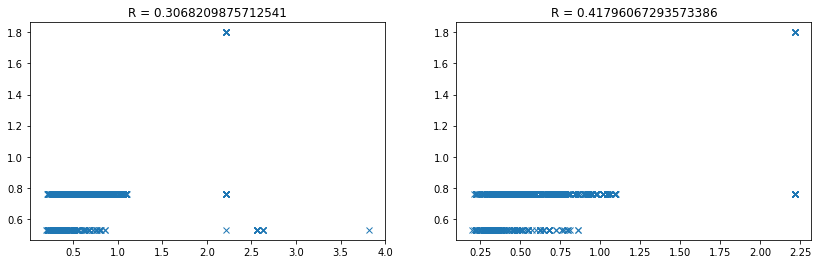

In [82]:
c35 = make_corrcoef(
    ds1=([r.lower_u for r in rows if r.lower_ins_type == '床断熱'], 
         [r.base_psi_inside for r in rows if r.lower_ins_type == '床断熱']),
    ds2=([r.lower_u for r in rows_filterd if r.lower_ins_type == '床断熱'],
         [r.base_psi_inside for r in rows_filterd if r.lower_ins_type == '床断熱']))

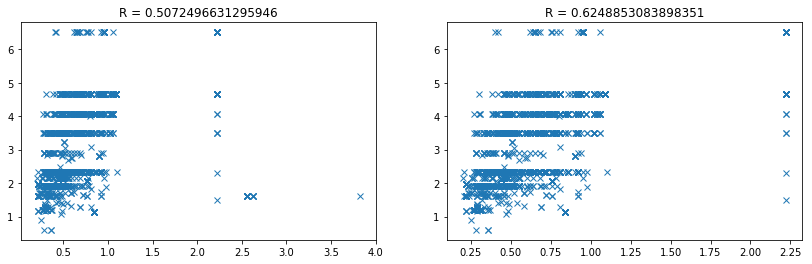

In [83]:
c36 = make_corrcoef(
    ds1=([r.lower_u for r in rows if r.lower_ins_type == '床断熱'], 
         [r.window_u for r in rows if r.lower_ins_type == '床断熱']),
    ds2=([r.lower_u for r in rows_filterd if r.lower_ins_type == '床断熱'],
         [r.window_u for r in rows_filterd if r.lower_ins_type == '床断熱']))

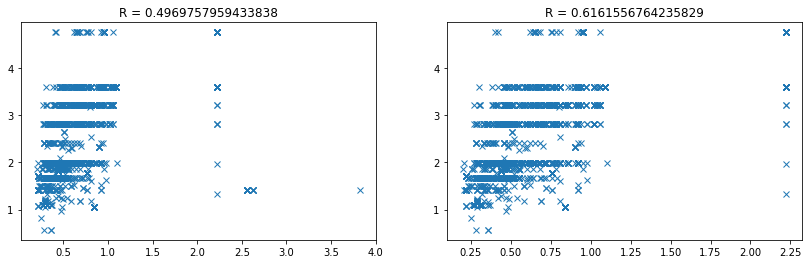

In [84]:
c37 = make_corrcoef(
    ds1=([r.lower_u for r in rows if r.lower_ins_type == '床断熱'], 
         [r.window_attachment_u for r in rows if r.lower_ins_type == '床断熱']),
    ds2=([r.lower_u for r in rows_filterd if r.lower_ins_type == '床断熱'],
         [r.window_attachment_u for r in rows_filterd if r.lower_ins_type == '床断熱']))

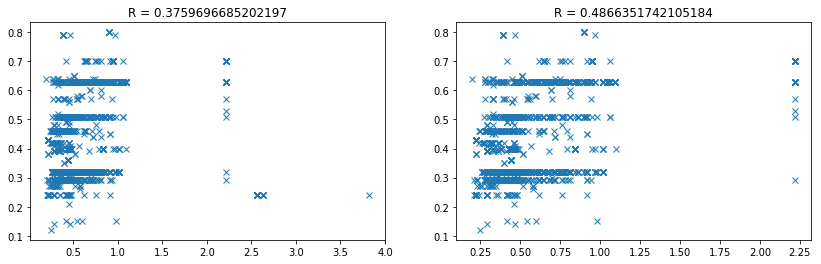

In [85]:
c38 = make_corrcoef(
    ds1=([r.lower_u for r in rows if r.lower_ins_type == '床断熱'], 
         [r.window_eta for r in rows if r.lower_ins_type == '床断熱']),
    ds2=([r.lower_u for r in rows_filterd if r.lower_ins_type == '床断熱'],
         [r.window_eta for r in rows_filterd if r.lower_ins_type == '床断熱']))

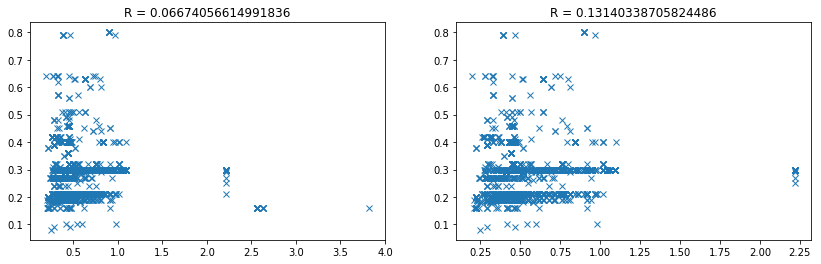

In [86]:
c39 = make_corrcoef(
    ds1=([r.lower_u for r in rows if r.lower_ins_type == '床断熱'], 
         [r.window_attachment_eta for r in rows if r.lower_ins_type == '床断熱']),
    ds2=([r.lower_u for r in rows_filterd if r.lower_ins_type == '床断熱'],
         [r.window_attachment_eta for r in rows_filterd if r.lower_ins_type == '床断熱']))

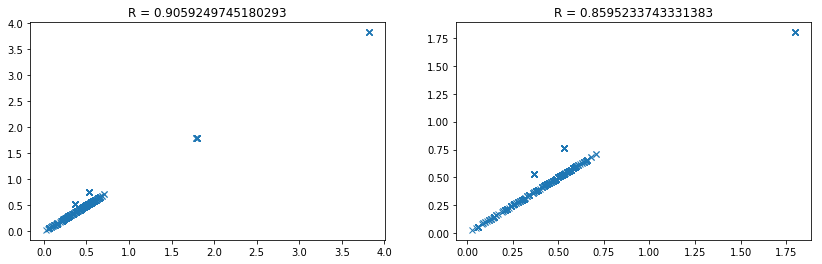

In [87]:
c45 = make_corrcoef(
    ds1=([r.base_psi_outside for r in rows], [r.base_psi_inside for r in rows]),
    ds2=([r.base_psi_outside for r in rows_filterd], [r.base_psi_inside for r in rows_filterd]))

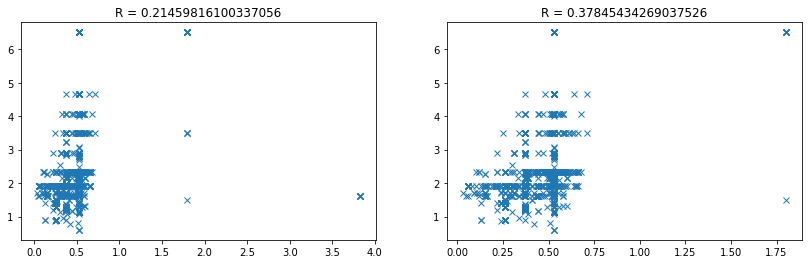

In [88]:
c46 = make_corrcoef(
    ds1=([r.base_psi_outside for r in rows], [r.window_u for r in rows]),
    ds2=([r.base_psi_outside for r in rows_filterd], [r.window_u for r in rows_filterd]))

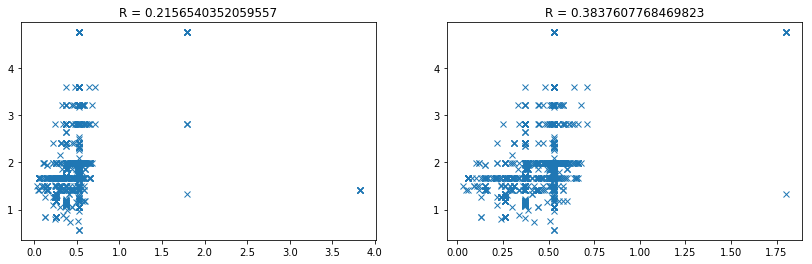

In [89]:
c47 = make_corrcoef(
    ds1=([r.base_psi_outside for r in rows], [r.window_attachment_u for r in rows]),
    ds2=([r.base_psi_outside for r in rows_filterd], [r.window_attachment_u for r in rows_filterd]))

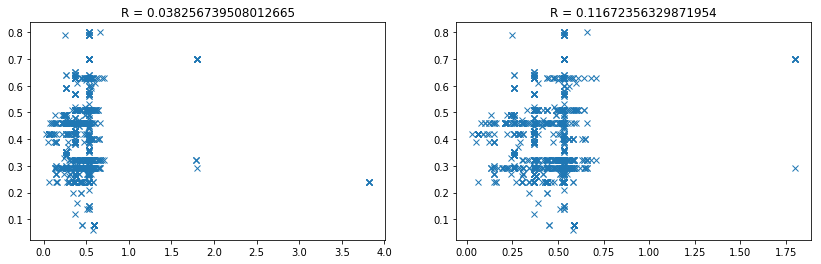

In [90]:
c48 = make_corrcoef(
    ds1=([r.base_psi_outside for r in rows], [r.window_eta for r in rows]),
    ds2=([r.base_psi_outside for r in rows_filterd], [r.window_eta for r in rows_filterd]))

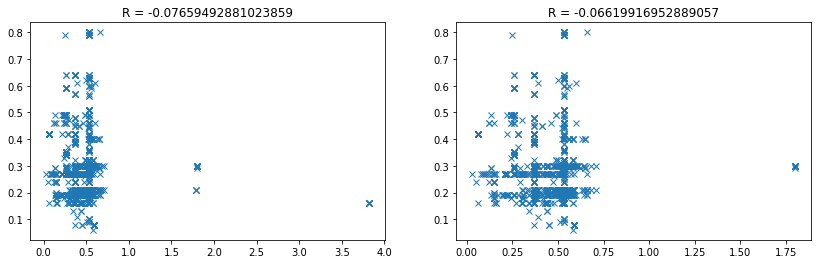

In [91]:
c49 = make_corrcoef(
    ds1=([r.base_psi_outside for r in rows], [r.window_attachment_eta for r in rows]),
    ds2=([r.base_psi_outside for r in rows_filterd], [r.window_attachment_eta for r in rows_filterd]))

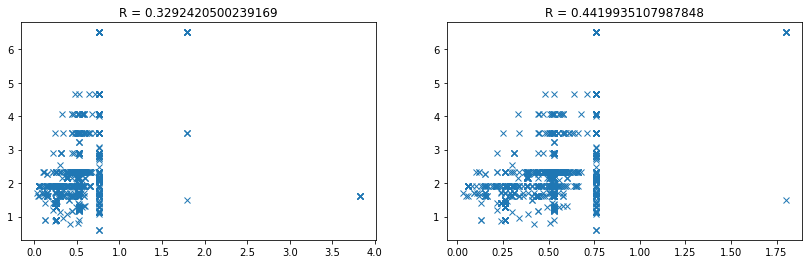

In [92]:
c56 = make_corrcoef(
    ds1=([r.base_psi_inside for r in rows], [r.window_u for r in rows]),
    ds2=([r.base_psi_inside for r in rows_filterd], [r.window_u for r in rows_filterd]))

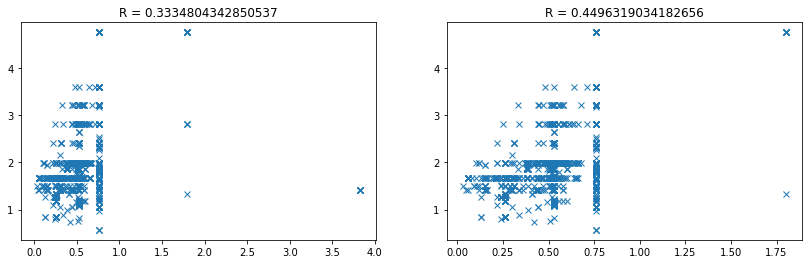

In [93]:
c57 = make_corrcoef(
    ds1=([r.base_psi_inside for r in rows], [r.window_attachment_u for r in rows]),
    ds2=([r.base_psi_inside for r in rows_filterd], [r.window_attachment_u for r in rows_filterd]))

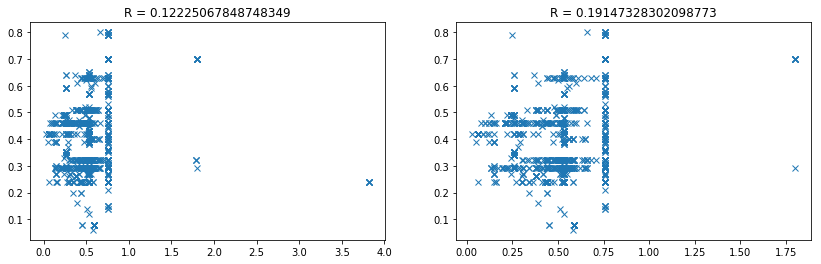

In [94]:
c58 = make_corrcoef(
    ds1=([r.base_psi_inside for r in rows], [r.window_eta for r in rows]),
    ds2=([r.base_psi_inside for r in rows_filterd], [r.window_eta for r in rows_filterd]))

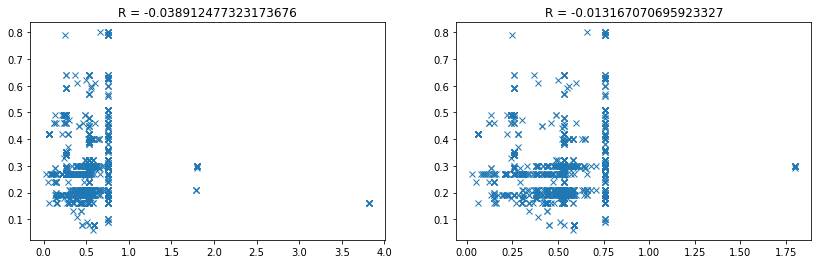

In [95]:
c59 = make_corrcoef(
    ds1=([r.base_psi_inside for r in rows], [r.window_attachment_eta for r in rows]),
    ds2=([r.base_psi_inside for r in rows_filterd], [r.window_attachment_eta for r in rows_filterd]))

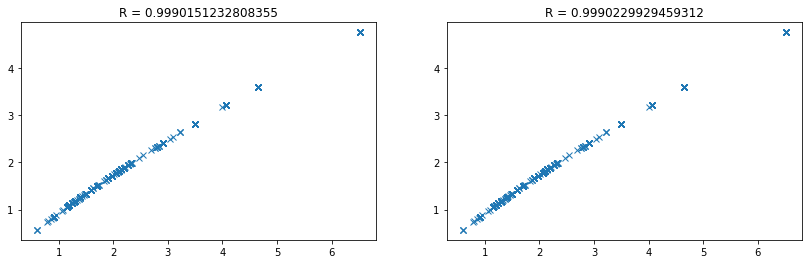

In [96]:
c67 = make_corrcoef(
    ds1=([r.window_u for r in rows], [r.window_attachment_u for r in rows]),
    ds2=([r.window_u for r in rows_filterd], [r.window_attachment_u for r in rows_filterd]))

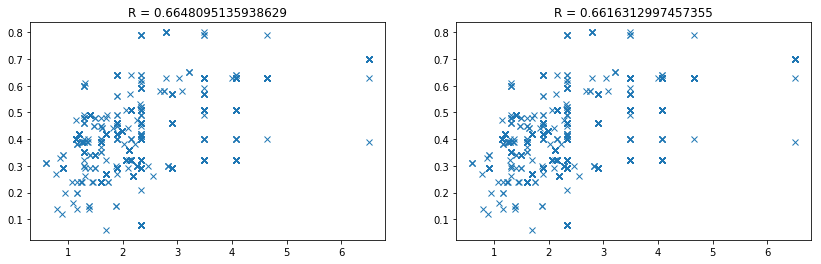

In [97]:
c68 = make_corrcoef(
    ds1=([r.window_u for r in rows], [r.window_eta for r in rows]),
    ds2=([r.window_u for r in rows_filterd], [r.window_eta for r in rows_filterd]))

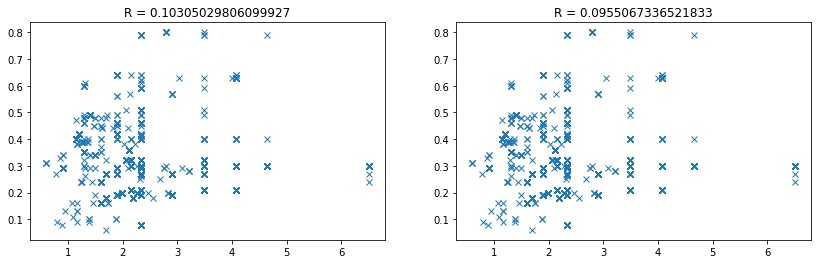

In [98]:
c69 = make_corrcoef(
    ds1=([r.window_u for r in rows], [r.window_attachment_eta for r in rows]),
    ds2=([r.window_u for r in rows_filterd], [r.window_attachment_eta for r in rows_filterd]))

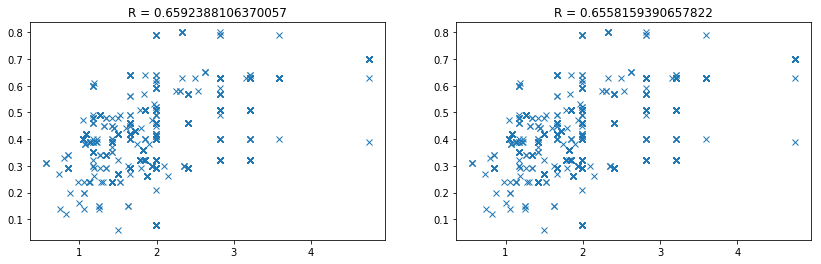

In [99]:
c78 = make_corrcoef(
    ds1=([r.window_attachment_u for r in rows], [r.window_eta for r in rows]),
    ds2=([r.window_attachment_u for r in rows_filterd], [r.window_eta for r in rows_filterd]))

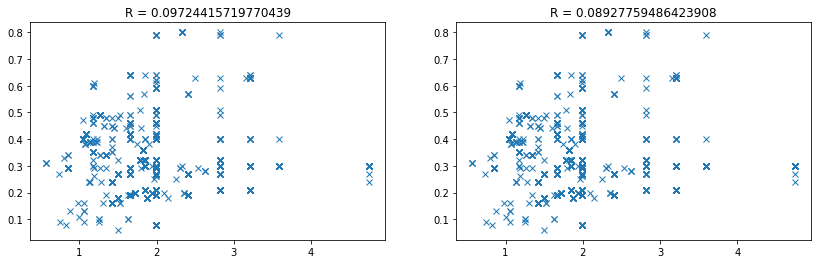

In [100]:
c79 = make_corrcoef(
    ds1=([r.window_attachment_u for r in rows], [r.window_attachment_eta for r in rows]),
    ds2=([r.window_attachment_u for r in rows_filterd], [r.window_attachment_eta for r in rows_filterd]))

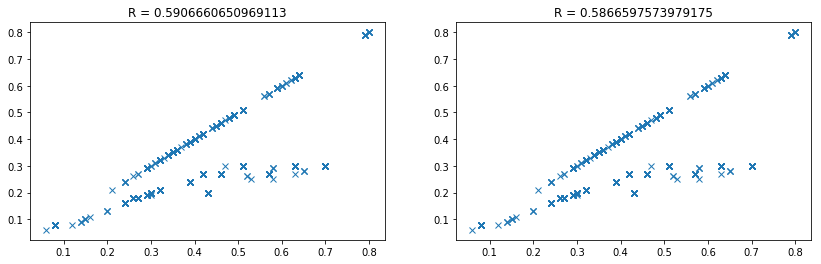

In [101]:
c89 = make_corrcoef(
    ds1=([r.window_eta for r in rows], [r.window_attachment_eta for r in rows]),
    ds2=([r.window_eta for r in rows_filterd], [r.window_attachment_eta for r in rows_filterd]))

## 相関係数

In [102]:
corrcoef = [
    [1.0, c12, c13, c14, c15, c16, c17, c18, c19],
    [c12, 1.0, c23, c24, c25, c26, c27, c28, c29],
    [c13, c23, 1.0, c34, c35, c36, c37, c38, c39],
    [c14, c24, c34, 1.0, c45, c46, c47, c48, c49],
    [c15, c25, c35, c45, 1.0, c56, c57, c58, c59],
    [c16, c26, c36, c46, c56, 1.0, c67, c68, c69],
    [c17, c27, c37, c47, c57, c67, 1.0, c78, c79],
    [c18, c28, c38, c48, c58, c68, c78, 1.0, c89],
    [c19, c29, c39, c49, c59, c69, c79, c89, 1.0]
]

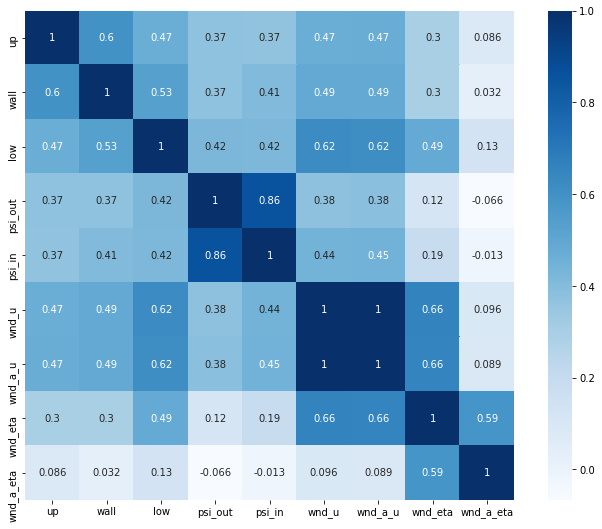

In [103]:
plt.figure(figsize=(12,9))
element_name = ['up', 'wall', 'low', 'psi_out', 'psi_in', 'wnd_u', 'wnd_a_u', 'wnd_eta', 'wnd_a_eta']
sns.heatmap(corrcoef, annot=True, cmap='Blues', square=True, xticklabels=element_name, yticklabels=element_name)
plt.show()

## 共分散

In [104]:
std_gp1 = [
    upper_u_prop_gp1.std, 
    wall_u_prop_gp1.std,
    lower_u_prop_gp1.std, 
    base_psi_outside_prop_gp1.std,
    base_psi_inside_prop_gp1.std,
    window_u_prop_gp1.std, 
    window_attachment_u_prop_gp1.std, 
    window_eta_gp1.std, 
    window_attachment_eta_gp1.std
]

std_gp2 = [
    upper_u_prop_gp2.std,
    wall_u_prop_gp2.std, 
    lower_u_prop_gp2.std, 
    base_psi_outside_prop_gp2.std,
    base_psi_inside_prop_gp2.std, 
    window_u_prop_gp2.std, 
    window_attachment_u_prop_gp2.std, 
    window_eta_gp2.std,
    window_attachment_eta_gp2.std
]

std_gp3 = [
    upper_u_prop_gp3.std,
    wall_u_prop_gp3.std, 
    lower_u_prop_gp3.std,
    base_psi_outside_prop_gp3.std,
    base_psi_inside_prop_gp3.std,
    window_u_prop_gp3.std, 
    window_attachment_u_prop_gp3.std, 
    window_eta_gp3.std, 
    window_attachment_eta_gp3.std
]

std_gp4 = [
    upper_u_prop_gp4.std, 
    wall_u_prop_gp4.std,
    lower_u_prop_gp4.std, 
    base_psi_outside_prop_gp4.std,
    base_psi_inside_prop_gp4.std,
    window_u_prop_gp4.std,
    window_attachment_u_prop_gp4.std, 
    window_eta_gp4.std, 
    window_attachment_eta_gp4.std
]

In [105]:
def make_covariance_matrix(std, corrcoef):
    result = [[0.0] * 9 for i in range(9)]
    for i in range(9):
        for j in range(9):
            result[i][j] = corrcoef[i][j] * std[i] * std[j]
    return result

In [106]:
cov1 = make_covariance_matrix(std_gp1, corrcoef)
cov2 = make_covariance_matrix(std_gp2, corrcoef)
cov3 = make_covariance_matrix(std_gp3, corrcoef)
cov4 = make_covariance_matrix(std_gp4, corrcoef)

# 変数の発生

## 平均

In [107]:
ave_gp1 = [
    upper_u_prop_gp1.average, 
    wall_u_prop_gp1.average,
    lower_u_prop_gp1.average, 
    base_psi_outside_prop_gp1.average,
    base_psi_inside_prop_gp1.average,
    window_u_prop_gp1.average, 
    window_attachment_u_prop_gp1.average, 
    window_eta_gp1.average, 
    window_attachment_eta_gp1.average
]

In [108]:
ave_gp2 = [
    upper_u_prop_gp2.average, 
    wall_u_prop_gp2.average,
    lower_u_prop_gp2.average, 
    base_psi_outside_prop_gp2.average,
    base_psi_inside_prop_gp2.average,
    window_u_prop_gp2.average, 
    window_attachment_u_prop_gp2.average, 
    window_eta_gp2.average, 
    window_attachment_eta_gp2.average
]

In [109]:
ave_gp3 = [
    upper_u_prop_gp3.average, 
    wall_u_prop_gp3.average,
    lower_u_prop_gp3.average, 
    base_psi_outside_prop_gp3.average,
    base_psi_inside_prop_gp3.average,
    window_u_prop_gp3.average, 
    window_attachment_u_prop_gp3.average, 
    window_eta_gp3.average, 
    window_attachment_eta_gp3.average
]

In [110]:
ave_gp4 = [
    upper_u_prop_gp4.average, 
    wall_u_prop_gp4.average,
    lower_u_prop_gp4.average, 
    base_psi_outside_prop_gp4.average,
    base_psi_inside_prop_gp4.average,
    window_u_prop_gp4.average, 
    window_attachment_u_prop_gp4.average, 
    window_eta_gp4.average, 
    window_attachment_eta_gp4.average
]

## ランダム発生

In [111]:
size = 100000
mont1 = np.random.multivariate_normal(mean=ave_gp1, cov=cov1, size=size)
mont2 = np.random.multivariate_normal(mean=ave_gp2, cov=cov2, size=size)
mont3 = np.random.multivariate_normal(mean=ave_gp3, cov=cov3, size=size)
mont4 = np.random.multivariate_normal(mean=ave_gp4, cov=cov4, size=size)

# ランダム発生させた値の結果の確認

## 対数関数の平均

平均が再現できていることの確認

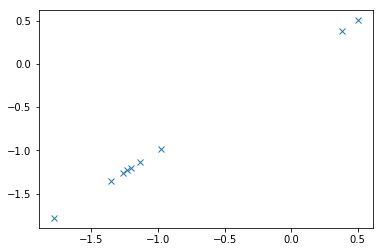

In [112]:
plt.plot(ave_gp1, np.average(mont1, axis=0), 'x')

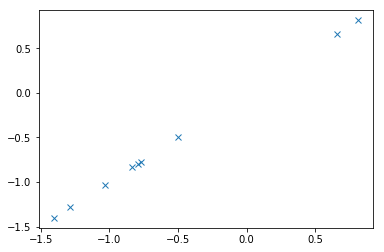

In [113]:
plt.plot(ave_gp2, np.average(mont2, axis=0), 'x')

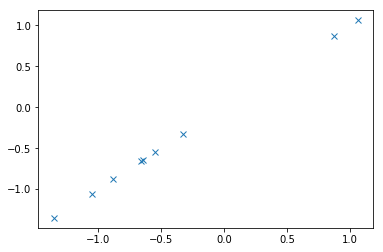

In [114]:
plt.plot(ave_gp3, np.average(mont3, axis=0), 'x')

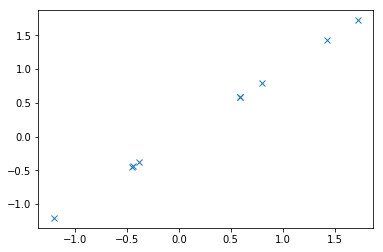

In [115]:
plt.plot(ave_gp4, np.average(mont4, axis=0), 'x')

標準偏差が一致していることの確認

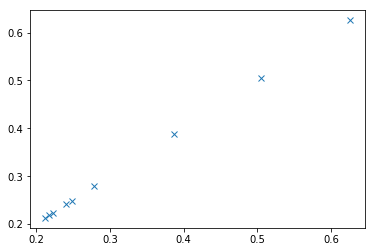

In [116]:
plt.plot(std_gp1, np.std(mont1, axis=0), 'x')

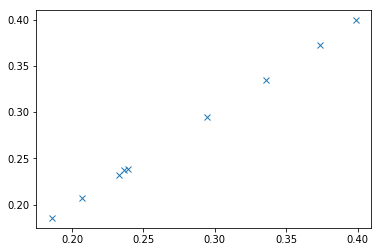

In [117]:
plt.plot(std_gp2, np.std(mont2, axis=0), 'x')

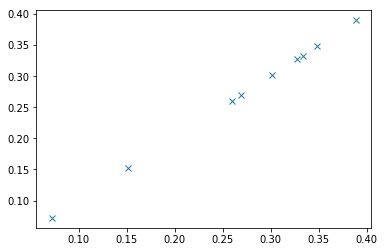

In [118]:
plt.plot(std_gp3, np.std(mont3, axis=0), 'x')

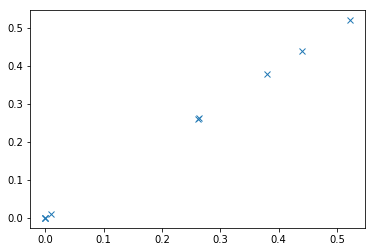

In [119]:
plt.plot(std_gp4, np.std(mont4, axis=0), 'x')

## 対数関数の標準偏差

標準偏差が再現できていることの確認

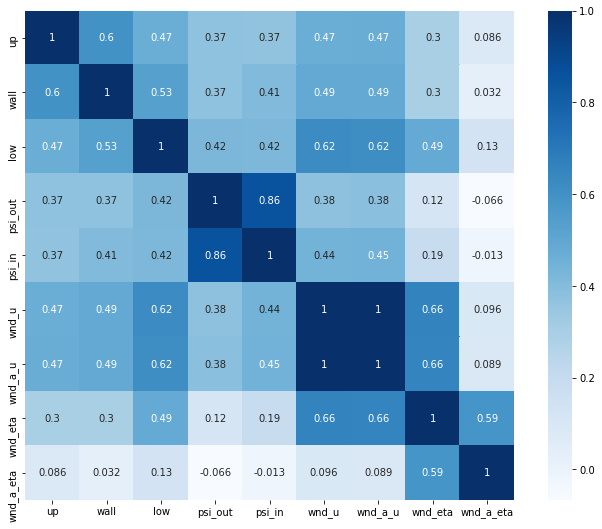

In [120]:
plt.figure(figsize=(12,9))
element_name = ['up', 'wall', 'low', 'psi_out', 'psi_in', 'wnd_u', 'wnd_a_u', 'wnd_eta', 'wnd_a_eta']
sns.heatmap(corrcoef, annot=True, cmap='Blues', square=True, xticklabels=element_name, yticklabels=element_name)
plt.show()

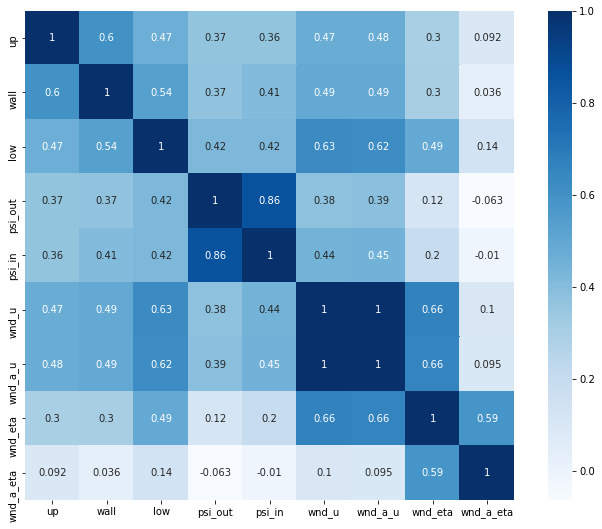

In [121]:
plt.figure(figsize=(12,9))
element_name = ['up', 'wall', 'low', 'psi_out', 'psi_in', 'wnd_u', 'wnd_a_u', 'wnd_eta', 'wnd_a_eta']
sns.heatmap(np.corrcoef(mont1.transpose()), annot=True, cmap='Blues', square=True,
            xticklabels=element_name, yticklabels=element_name)
plt.show()

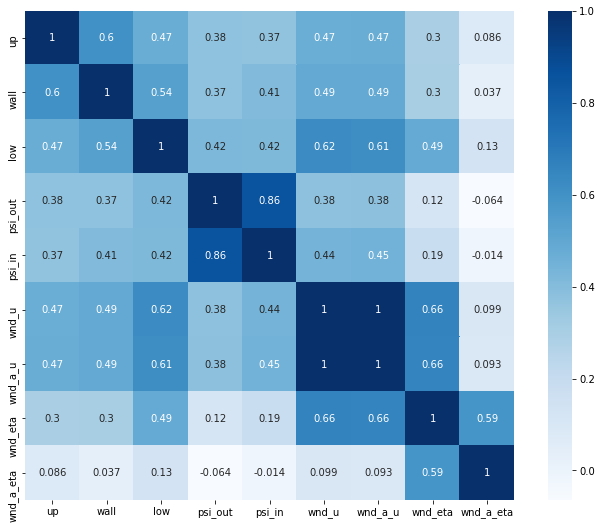

In [122]:
plt.figure(figsize=(12,9))
element_name = ['up', 'wall', 'low', 'psi_out', 'psi_in', 'wnd_u', 'wnd_a_u', 'wnd_eta', 'wnd_a_eta']
sns.heatmap(np.corrcoef(mont2.transpose()), annot=True, cmap='Blues', square=True,
            xticklabels=element_name, yticklabels=element_name)
plt.show()

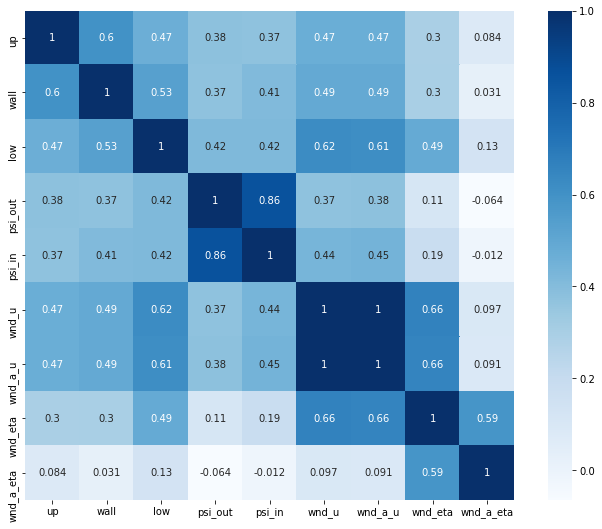

In [123]:
plt.figure(figsize=(12,9))
element_name = ['up', 'wall', 'low', 'psi_out', 'psi_in', 'wnd_u', 'wnd_a_u', 'wnd_eta', 'wnd_a_eta']
sns.heatmap(np.corrcoef(mont3.transpose()), annot=True, cmap='Blues', square=True,
            xticklabels=element_name, yticklabels=element_name)
plt.show()

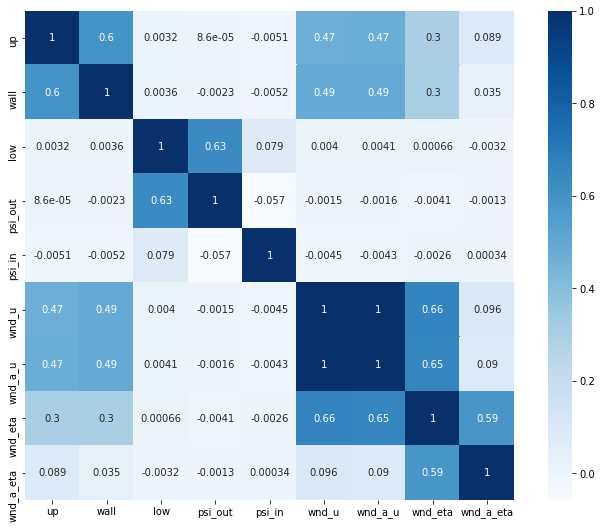

In [124]:
plt.figure(figsize=(12,9))
element_name = ['up', 'wall', 'low', 'psi_out', 'psi_in', 'wnd_u', 'wnd_a_u', 'wnd_eta', 'wnd_a_eta']
sns.heatmap(np.corrcoef(mont4.transpose()), annot=True, cmap='Blues', square=True,
            xticklabels=element_name, yticklabels=element_name)
plt.show()

## 実際の値との比較（項目別の分布）

In [125]:
def draw_comparison_graphs_average(specify, est_index):
    
    bins = 50
    
    fig = plt.figure(figsize=(12,7))
    
    ax1 = fig.add_subplot(2,2,1)
    ax1.hist(specify(group1), alpha=0.3, histtype='stepfilled', color='r', density=True, bins=bins, label='real')
    ax1.hist(np.exp(mont1[:,est_index]), alpha=0.3, histtype='stepfilled', color='b', density=True, bins=bins, label='estimated')
    ax1.set_title('region 1, 2')

    ax2 = fig.add_subplot(2,2,2)
    ax2.hist(specify(group2), alpha=0.3, histtype='stepfilled', color='r', density=True, bins=bins, label='real')
    ax2.hist(np.exp(mont2[:,est_index]), alpha=0.3, histtype='stepfilled', color='b', density=True, bins=bins, label='estimated')
    ax2.set_title('region 3, 4')

    ax3 = fig.add_subplot(2,2,3)
    ax3.hist(specify(group3), alpha=0.3, histtype='stepfilled', color='r', density=True, bins=bins, label='real')
    ax3.hist(np.exp(mont3[:,est_index]), alpha=0.3, histtype='stepfilled', color='b', density=True, bins=bins, label='estimated')
    ax3.set_title('region 5, 6, 7')

    ax3 = fig.add_subplot(2,2,4)
    ax3.hist(specify(group4), alpha=0.3, histtype='stepfilled', color='r', density=True, bins=bins, label='real')
    ax3.hist(np.exp(mont4[:,est_index]), alpha=0.3, histtype='stepfilled', color='b', density=True, bins=bins, label='estimated')
    ax3.set_title('region 8')
    
    plt.show()

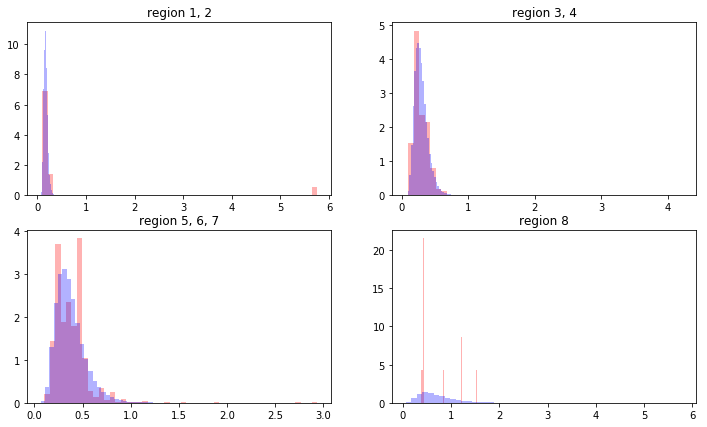

In [126]:
draw_comparison_graphs_average(specify=lambda gp: [r.upper_u for r in gp], est_index=0)

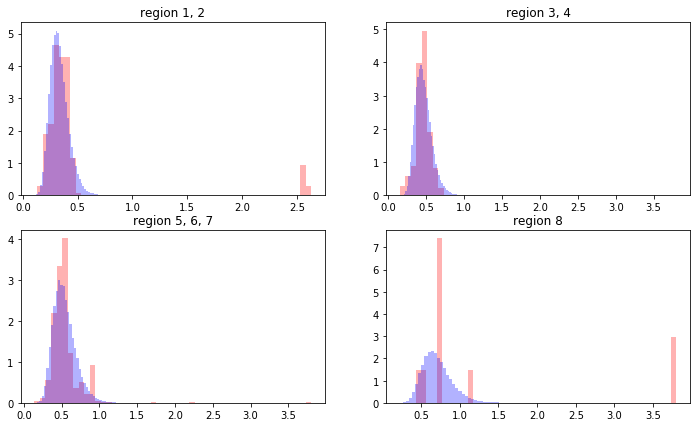

In [127]:
draw_comparison_graphs_average(specify=lambda gp: [r.wall_u for r in gp], est_index=1)

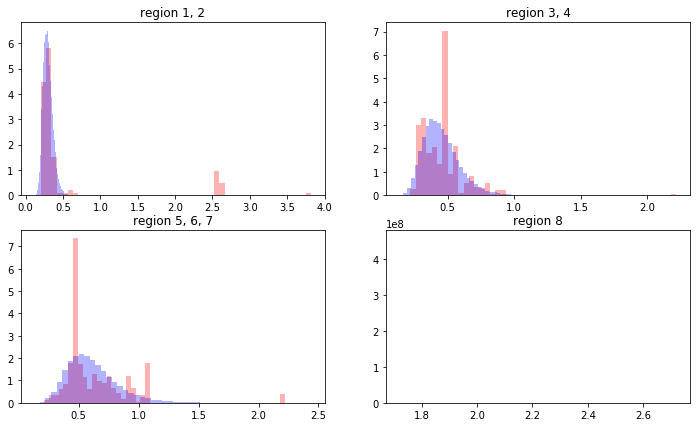

In [128]:
draw_comparison_graphs_average(specify=lambda gp: [r.lower_u for r in gp if r.lower_ins_type == '床断熱'], est_index=2)

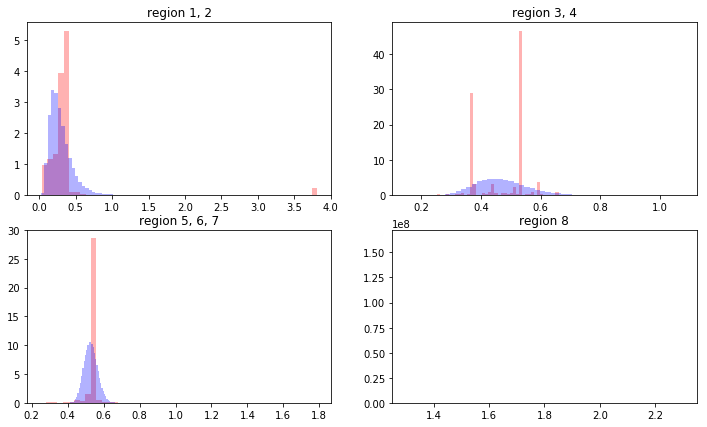

In [129]:
draw_comparison_graphs_average(specify=lambda gp: [r.base_psi_outside for r in gp], est_index=3)

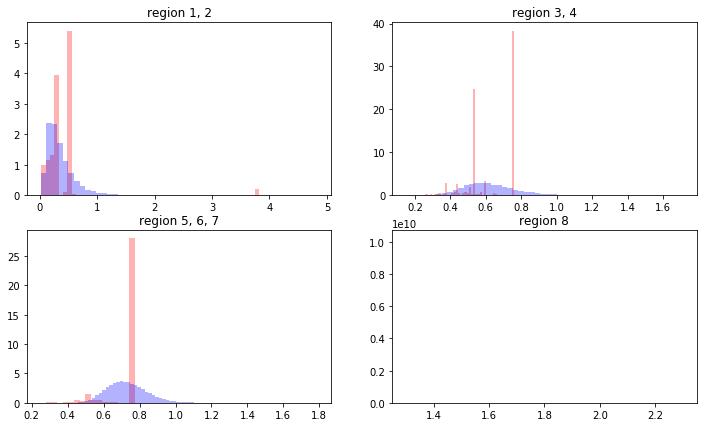

In [130]:
draw_comparison_graphs_average(specify=lambda gp: [r.base_psi_inside for r in gp], est_index=4)

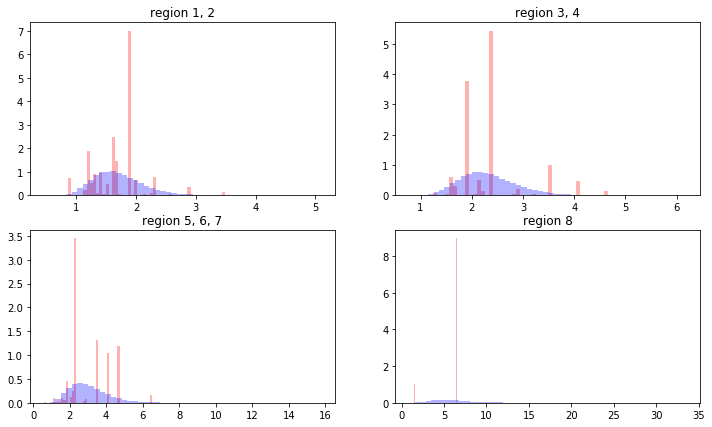

In [131]:
draw_comparison_graphs_average(specify=lambda gp: [r.window_u for r in gp], est_index=5)

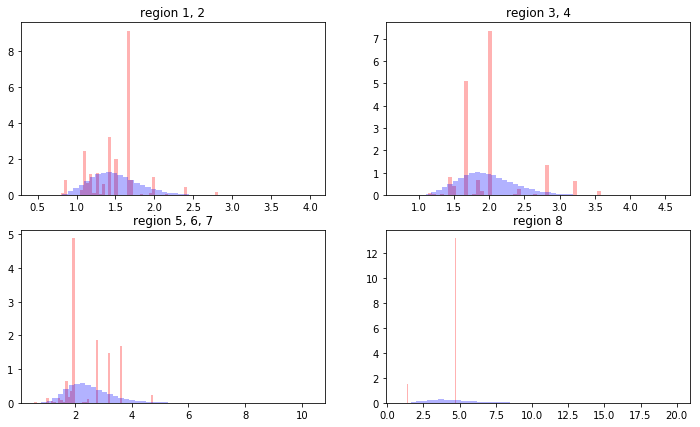

In [132]:
draw_comparison_graphs_average(specify=lambda gp: [r.window_attachment_u for r in gp], est_index=6)

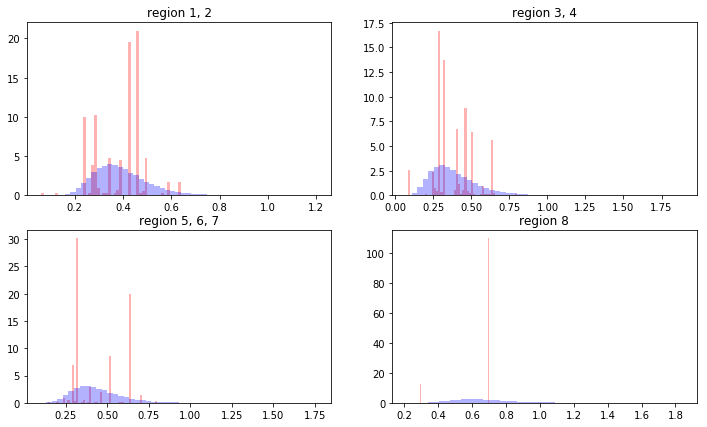

In [133]:
draw_comparison_graphs_average(specify=lambda gp: [r.window_eta for r in gp], est_index=7)

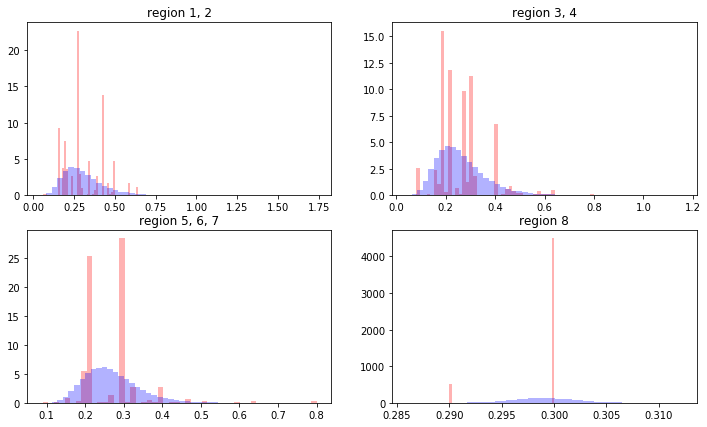

In [134]:
draw_comparison_graphs_average(specify=lambda gp: [r.window_attachment_eta for r in gp], est_index=8)

## 実際の値との比較（相関係数）

In [135]:
def draw_corrcoef_comparison(specify, est_index):
    
    fig = plt.figure(figsize=(14,18))
    
    x0 = specify[0](rows_filterd)
    y0 = specify[1](rows_filterd)
    
    x1 = mont1[:, est_index[0]]
    y1 = mont1[:, est_index[1]]
    
    x2 = mont2[:, est_index[0]]
    y2 = mont2[:, est_index[1]]

    x3 = mont3[:, est_index[0]]
    y3 = mont3[:, est_index[1]]

    x4 = mont4[:, est_index[0]]
    y4 = mont4[:, est_index[1]]
    
    corrcoef0 = np.corrcoef(x0, y0)[1][0]
    corrcoef1 = np.corrcoef(x1, y1)[1][0]
    corrcoef2 = np.corrcoef(x2, y2)[1][0]
    corrcoef3 = np.corrcoef(x3, y3)[1][0]
    corrcoef4 = np.corrcoef(x4, y4)[1][0]    
    
#    ax0 = fig.add_subplot(3,2,1)
#    ax0.plot(x0, y0, 'x')
#    ax0.set_title('R = ' + str(corrcoef0))
    
#    ax1 = fig.add_subplot(3,2,3)
#    ax1.plot(x1, y1, 'x')
#    ax1.set_title('R = ' + str(corrcoef1))
    
#    ax2 = fig.add_subplot(3,2,4)
#    ax2.plot(x2, y2, 'x')
#    ax2.set_title('R = ' + str(corrcoef2))

#    ax3 = fig.add_subplot(3,2,5)
#    ax3.plot(x3, y3, 'x')
#    ax3.set_title('R = ' + str(corrcoef3))

#    ax4 = fig.add_subplot(3,2,6)
#    ax4.plot(x4, y4, 'x')
#    ax4.set_title('R = ' + str(corrcoef4))

#    plt.show()

    print('実測値の相関係数: ' + str(corrcoef0))
    print('推定値の相関係数（グループ1）: ' + str(corrcoef1))
    print('推定値の相関係数（グループ2）: ' + str(corrcoef2))
    print('推定値の相関係数（グループ3）: ' + str(corrcoef3))
    print('推定値の相関係数（グループ4）: ' + str(corrcoef4))

### 上部のU値・外壁のU値

In [136]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.upper_u for r in gp],
        lambda gp: [r.wall_u for r in gp]],
    est_index=[0,1])

実測値の相関係数: 0.5999792631453565
推定値の相関係数（グループ1）: 0.600446656751511
推定値の相関係数（グループ2）: 0.6022230062308442
推定値の相関係数（グループ3）: 0.5997241292374742
推定値の相関係数（グループ4）: 0.5972485057365983


<Figure size 1008x1296 with 0 Axes>

### 上部のU値・下部のU値

In [137]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.upper_u for r in gp if r.lower_ins_type == '床断熱'],
        lambda gp: [r.lower_u for r in gp if r.lower_ins_type == '床断熱']],
    est_index=[0,2])

実測値の相関係数: 0.46740289763415294
推定値の相関係数（グループ1）: 0.4681079673032858
推定値の相関係数（グループ2）: 0.4724177436539116
推定値の相関係数（グループ3）: 0.46746018124774835
推定値の相関係数（グループ4）: 0.0032376676271726533


<Figure size 1008x1296 with 0 Axes>

### 上部のU値・土間床外気側のψ値

In [138]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.upper_u for r in gp],
        lambda gp: [r.base_psi_outside for r in gp]],
    est_index=[0,3])

実測値の相関係数: 0.3732180173142221
推定値の相関係数（グループ1）: 0.3666460381669249
推定値の相関係数（グループ2）: 0.37509370146586996
推定値の相関係数（グループ3）: 0.3767304919845389
推定値の相関係数（グループ4）: 8.62924214205189e-05


<Figure size 1008x1296 with 0 Axes>

### 上部のU値・土間床床下側のψ値

In [139]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.upper_u for r in gp],
        lambda gp: [r.base_psi_inside for r in gp]],
    est_index=[0,4])

実測値の相関係数: 0.3697673843679238
推定値の相関係数（グループ1）: 0.36478121997106366
推定値の相関係数（グループ2）: 0.3684851893376442
推定値の相関係数（グループ3）: 0.3747455555106625
推定値の相関係数（グループ4）: -0.005117394298172082


<Figure size 1008x1296 with 0 Axes>

### 上部のU値・窓のU値

In [140]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.upper_u for r in gp],
        lambda gp: [r.window_u for r in gp]],
    est_index=[0,5])

実測値の相関係数: 0.4706643775195896
推定値の相関係数（グループ1）: 0.47342546125196
推定値の相関係数（グループ2）: 0.4717610563541398
推定値の相関係数（グループ3）: 0.4692282248746283
推定値の相関係数（グループ4）: 0.47011826435158593


<Figure size 1008x1296 with 0 Axes>

### 上部のU値・窓（障子）のU値

In [141]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.upper_u for r in gp],
        lambda gp: [r.window_attachment_u for r in gp]],
    est_index=[0,6])

実測値の相関係数: 0.4724515977355319
推定値の相関係数（グループ1）: 0.47541874569189835
推定値の相関係数（グループ2）: 0.4734913198705611
推定値の相関係数（グループ3）: 0.4711207321018515
推定値の相関係数（グループ4）: 0.4719520320878851


<Figure size 1008x1296 with 0 Axes>

### 上部のU値・窓のη値

In [142]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.upper_u for r in gp],
        lambda gp: [r.window_eta for r in gp]],
    est_index=[0,7])

実測値の相関係数: 0.2966155967287341
推定値の相関係数（グループ1）: 0.30184637176473594
推定値の相関係数（グループ2）: 0.2974103533808327
推定値の相関係数（グループ3）: 0.29723154414391745
推定値の相関係数（グループ4）: 0.2993463289687357


<Figure size 1008x1296 with 0 Axes>

### 上部のU値・窓（障子）のη値

In [143]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.upper_u for r in gp],
        lambda gp: [r.window_attachment_eta for r in gp]],
    est_index=[0,8])

実測値の相関係数: 0.08552494292755608
推定値の相関係数（グループ1）: 0.09210181900475994
推定値の相関係数（グループ2）: 0.08562311223498298
推定値の相関係数（グループ3）: 0.08371618946484828
推定値の相関係数（グループ4）: 0.08883060825065159


<Figure size 1008x1296 with 0 Axes>

### 外壁のU値・下部のU値

In [144]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.wall_u for r in gp if r.lower_ins_type == '床断熱'],
        lambda gp: [r.lower_u for r in gp if r.lower_ins_type == '床断熱']],
    est_index=[1,2])

実測値の相関係数: 0.5344457638228891
推定値の相関係数（グループ1）: 0.5375526455780242
推定値の相関係数（グループ2）: 0.5361410814552591
推定値の相関係数（グループ3）: 0.5323237271902346
推定値の相関係数（グループ4）: 0.003558043759682766


<Figure size 1008x1296 with 0 Axes>

### 外壁のU値・土間床外気側のψ値

In [145]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.wall_u for r in gp],
        lambda gp: [r.base_psi_outside for r in gp]],
    est_index=[1,3])

実測値の相関係数: 0.373149359764646
推定値の相関係数（グループ1）: 0.3688950766535991
推定値の相関係数（グループ2）: 0.37481278573387816
推定値の相関係数（グループ3）: 0.3742149770216467
推定値の相関係数（グループ4）: -0.002257669731995392


<Figure size 1008x1296 with 0 Axes>

### 外壁のU値・土間床床下側のψ値

In [146]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.wall_u for r in gp],
        lambda gp: [r.base_psi_inside for r in gp]],
    est_index=[1,4])

実測値の相関係数: 0.41164323721494533
推定値の相関係数（グループ1）: 0.407702285656978
推定値の相関係数（グループ2）: 0.41082401300825655
推定値の相関係数（グループ3）: 0.4134108997930065
推定値の相関係数（グループ4）: -0.0052180877186342005


<Figure size 1008x1296 with 0 Axes>

### 外壁のU値・窓のU値

In [147]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.wall_u for r in gp],
        lambda gp: [r.window_u for r in gp]],
    est_index=[1,5])

実測値の相関係数: 0.48898490915917325
推定値の相関係数（グループ1）: 0.4930255131317739
推定値の相関係数（グループ2）: 0.4902892543516907
推定値の相関係数（グループ3）: 0.48897108799992967
推定値の相関係数（グループ4）: 0.4903402235459139


<Figure size 1008x1296 with 0 Axes>

### 外壁のU値・窓（障子）のU値

In [148]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.wall_u for r in gp],
        lambda gp: [r.window_attachment_u for r in gp]],
    est_index=[1,6])

実測値の相関係数: 0.48904631656698644
推定値の相関係数（グループ1）: 0.49314228702057494
推定値の相関係数（グループ2）: 0.4904216085429634
推定値の相関係数（グループ3）: 0.4891322479230464
推定値の相関係数（グループ4）: 0.4904641677023215


<Figure size 1008x1296 with 0 Axes>

### 外壁のU値・窓のη値

In [149]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.wall_u for r in gp],
        lambda gp: [r.window_eta for r in gp]],
    est_index=[1,7])

実測値の相関係数: 0.29954083383464675
推定値の相関係数（グループ1）: 0.3036915517534443
推定値の相関係数（グループ2）: 0.30255648730187384
推定値の相関係数（グループ3）: 0.30012296910425196
推定値の相関係数（グループ4）: 0.3022369024418697


<Figure size 1008x1296 with 0 Axes>

### 外壁のU値・窓（障子）のη値

In [150]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.wall_u for r in gp],
        lambda gp: [r.window_attachment_eta for r in gp]],
    est_index=[1,8])

実測値の相関係数: 0.031672954445559745
推定値の相関係数（グループ1）: 0.036052521519191257
推定値の相関係数（グループ2）: 0.03681336441844382
推定値の相関係数（グループ3）: 0.030505696989231636
推定値の相関係数（グループ4）: 0.035319659281728776


<Figure size 1008x1296 with 0 Axes>

### 下部のU値・土間床外気側のψ値

In [151]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.lower_u for r in gp if r.lower_ins_type == '床断熱'],
        lambda gp: [r.base_psi_outside for r in gp if r.lower_ins_type == '床断熱']],
    est_index=[2,3])

実測値の相関係数: 0.42109590663521823
推定値の相関係数（グループ1）: 0.41933811217880357
推定値の相関係数（グループ2）: 0.42145596000894503
推定値の相関係数（グループ3）: 0.41711591327047676
推定値の相関係数（グループ4）: 0.6311269328878574


<Figure size 1008x1296 with 0 Axes>

### 下部のU値・土間床床下側のψ値

In [152]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.lower_u for r in gp if r.lower_ins_type == '床断熱'],
        lambda gp: [r.base_psi_inside for r in gp if r.lower_ins_type == '床断熱']],
    est_index=[2,4])

実測値の相関係数: 0.41796067293573386
推定値の相関係数（グループ1）: 0.41925698943832873
推定値の相関係数（グループ2）: 0.4159202521889119
推定値の相関係数（グループ3）: 0.4155639504625923
推定値の相関係数（グループ4）: 0.0787738553785995


<Figure size 1008x1296 with 0 Axes>

### 下部のU値・窓のU値

In [153]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.lower_u for r in gp if r.lower_ins_type == '床断熱'],
        lambda gp: [r.window_u for r in gp if r.lower_ins_type == '床断熱']],
    est_index=[2,5])

実測値の相関係数: 0.6248853083898351
推定値の相関係数（グループ1）: 0.6273113941471599
推定値の相関係数（グループ2）: 0.6237894240912886
推定値の相関係数（グループ3）: 0.6238685984576189
推定値の相関係数（グループ4）: 0.003954548356490815


<Figure size 1008x1296 with 0 Axes>

### 下部のU値・窓（障子）のU値

In [154]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.lower_u for r in gp if r.lower_ins_type == '床断熱'],
        lambda gp: [r.window_attachment_u for r in gp if r.lower_ins_type == '床断熱']],
    est_index=[2,6])

実測値の相関係数: 0.6161556764235829
推定値の相関係数（グループ1）: 0.6188265902831451
推定値の相関係数（グループ2）: 0.6149937024100293
推定値の相関係数（グループ3）: 0.6149656866442442
推定値の相関係数（グループ4）: 0.004075652974216342


<Figure size 1008x1296 with 0 Axes>

### 下部のU値・窓のη値

In [155]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.lower_u for r in gp if r.lower_ins_type == '床断熱'],
        lambda gp: [r.window_eta for r in gp if r.lower_ins_type == '床断熱']],
    est_index=[2,7])

実測値の相関係数: 0.4866351742105184
推定値の相関係数（グループ1）: 0.49122272093042446
推定値の相関係数（グループ2）: 0.48813830384392204
推定値の相関係数（グループ3）: 0.4869649459818431
推定値の相関係数（グループ4）: 0.0006642143190387966


<Figure size 1008x1296 with 0 Axes>

### 下部のU値・窓（障子）のη値

In [156]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.lower_u for r in gp if r.lower_ins_type == '床断熱'],
        lambda gp: [r.window_attachment_eta for r in gp if r.lower_ins_type == '床断熱']],
    est_index=[2,8])

実測値の相関係数: 0.13140338705824486
推定値の相関係数（グループ1）: 0.13956300121314247
推定値の相関係数（グループ2）: 0.13255827469910395
推定値の相関係数（グループ3）: 0.1319675631068553
推定値の相関係数（グループ4）: -0.00316192239947236


<Figure size 1008x1296 with 0 Axes>

### 土間床外気側のψ値・土間床床下側のψ値

In [157]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.base_psi_outside for r in gp],
        lambda gp: [r.base_psi_inside for r in gp]],
    est_index=[3,4])

実測値の相関係数: 0.8595233743331383
推定値の相関係数（グループ1）: 0.8603393897185203
推定値の相関係数（グループ2）: 0.858192262637654
推定値の相関係数（グループ3）: 0.859265423896563
推定値の相関係数（グループ4）: -0.057329720164427916


<Figure size 1008x1296 with 0 Axes>

### 土間床外気側のψ値・窓のU値

In [158]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.base_psi_outside for r in gp],
        lambda gp: [r.window_u for r in gp]],
    est_index=[3,5])

実測値の相関係数: 0.37845434269037526
推定値の相関係数（グループ1）: 0.3798275114122304
推定値の相関係数（グループ2）: 0.37734087802383415
推定値の相関係数（グループ3）: 0.37273477414338785
推定値の相関係数（グループ4）: -0.0015457271594292222


<Figure size 1008x1296 with 0 Axes>

### 土間床外気側のψ値・窓（障子）のU値

In [159]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.base_psi_outside for r in gp],
        lambda gp: [r.window_attachment_u for r in gp]],
    est_index=[3,6])

実測値の相関係数: 0.3837607768469823
推定値の相関係数（グループ1）: 0.38530907030430006
推定値の相関係数（グループ2）: 0.3826421776548321
推定値の相関係数（グループ3）: 0.3780181470157517
推定値の相関係数（グループ4）: -0.001564823983254486


<Figure size 1008x1296 with 0 Axes>

### 土間床外気側のψ値・窓のη値

In [160]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.base_psi_outside for r in gp],
        lambda gp: [r.window_eta for r in gp]],
    est_index=[3,7])

実測値の相関係数: 0.11672356329871954
推定値の相関係数（グループ1）: 0.12156759466934257
推定値の相関係数（グループ2）: 0.11662831502794925
推定値の相関係数（グループ3）: 0.11354293258039656
推定値の相関係数（グループ4）: -0.004052772014347017


<Figure size 1008x1296 with 0 Axes>

### 土間床外気側のψ値・窓（障子）のη値

In [161]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.base_psi_outside for r in gp],
        lambda gp: [r.window_attachment_eta for r in gp]],
    est_index=[3,8])

実測値の相関係数: -0.06619916952889057
推定値の相関係数（グループ1）: -0.06344660118672352
推定値の相関係数（グループ2）: -0.06385028847407002
推定値の相関係数（グループ3）: -0.06403803399480465
推定値の相関係数（グループ4）: -0.0012892941437735966


<Figure size 1008x1296 with 0 Axes>

### 土間床床下側のψ値・窓のU値

In [162]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.base_psi_inside for r in gp],
        lambda gp: [r.window_u for r in gp]],
    est_index=[4,5])

実測値の相関係数: 0.4419935107987848
推定値の相関係数（グループ1）: 0.4433994451600036
推定値の相関係数（グループ2）: 0.4405192842013905
推定値の相関係数（グループ3）: 0.4375865188229905
推定値の相関係数（グループ4）: -0.004530434138187655


<Figure size 1008x1296 with 0 Axes>

### 土間床床下側のψ値・窓（障子）のU値

In [163]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.base_psi_inside for r in gp],
        lambda gp: [r.window_attachment_u for r in gp]],
    est_index=[4,6])

実測値の相関係数: 0.4496319034182656
推定値の相関係数（グループ1）: 0.45113945742563055
推定値の相関係数（グループ2）: 0.4482771010230277
推定値の相関係数（グループ3）: 0.44524686043313966
推定値の相関係数（グループ4）: -0.004348758065524137


<Figure size 1008x1296 with 0 Axes>

### 土間床床下側のψ値・窓のη値

In [164]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.base_psi_inside for r in gp],
        lambda gp: [r.window_eta for r in gp]],
    est_index=[4,7])

実測値の相関係数: 0.19147328302098773
推定値の相関係数（グループ1）: 0.1967389661221666
推定値の相関係数（グループ2）: 0.1893984098802459
推定値の相関係数（グループ3）: 0.18921407693461542
推定値の相関係数（グループ4）: -0.002613150572444055


<Figure size 1008x1296 with 0 Axes>

### 土間床床下側のψ値・窓（障子）のη値

In [165]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.base_psi_inside for r in gp],
        lambda gp: [r.window_attachment_eta for r in gp]],
    est_index=[4,8])

実測値の相関係数: -0.013167070695923327
推定値の相関係数（グループ1）: -0.010133543179190893
推定値の相関係数（グループ2）: -0.014465477727577062
推定値の相関係数（グループ3）: -0.012243443561777445
推定値の相関係数（グループ4）: 0.00034267047914685365


<Figure size 1008x1296 with 0 Axes>

### 窓のU値・窓（障子）のU値

In [166]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.window_u for r in gp],
        lambda gp: [r.window_attachment_u for r in gp]],
    est_index=[5,6])

実測値の相関係数: 0.9990229929459312
推定値の相関係数（グループ1）: 0.9990334223810194
推定値の相関係数（グループ2）: 0.999016390103862
推定値の相関係数（グループ3）: 0.999019524144465
推定値の相関係数（グループ4）: 0.9990206562393436


<Figure size 1008x1296 with 0 Axes>

### 窓のU値・窓のη値

In [167]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.window_u for r in gp],
        lambda gp: [r.window_eta for r in gp]],
    est_index=[5,7])

実測値の相関係数: 0.6616312997457355
推定値の相関係数（グループ1）: 0.6638243049768554
推定値の相関係数（グループ2）: 0.6624205569675928
推定値の相関係数（グループ3）: 0.6637353181409421
推定値の相関係数（グループ4）: 0.6605478095366086


<Figure size 1008x1296 with 0 Axes>

### 窓のU値・窓（障子）のη値

In [168]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.window_u for r in gp],
        lambda gp: [r.window_attachment_eta for r in gp]],
    est_index=[5,8])

実測値の相関係数: 0.0955067336521833
推定値の相関係数（グループ1）: 0.10152115349725496
推定値の相関係数（グループ2）: 0.09928528982043724
推定値の相関係数（グループ3）: 0.09697063176544404
推定値の相関係数（グループ4）: 0.09583596629675231


<Figure size 1008x1296 with 0 Axes>

### 窓（障子）のU値・窓のη値

In [169]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.window_attachment_u for r in gp],
        lambda gp: [r.window_eta for r in gp]],
    est_index=[6,7])

実測値の相関係数: 0.6558159390657822
推定値の相関係数（グループ1）: 0.6580656549609307
推定値の相関係数（グループ2）: 0.6566175778121198
推定値の相関係数（グループ3）: 0.6578196804482893
推定値の相関係数（グループ4）: 0.6547138959641623


<Figure size 1008x1296 with 0 Axes>

### 窓（障子）のU値・窓（障子）のη値

In [170]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.window_attachment_u for r in gp],
        lambda gp: [r.window_attachment_eta for r in gp]],
    est_index=[6,8])

実測値の相関係数: 0.08927759486423908
推定値の相関係数（グループ1）: 0.09543729027397997
推定値の相関係数（グループ2）: 0.09319112827079876
推定値の相関係数（グループ3）: 0.09054516567983326
推定値の相関係数（グループ4）: 0.0895729996788623


<Figure size 1008x1296 with 0 Axes>

### 窓のη値・窓（障子）のη値

In [171]:
draw_corrcoef_comparison(
    specify=[
        lambda gp: [r.window_eta for r in gp],
        lambda gp: [r.window_attachment_eta for r in gp]],
    est_index=[7,8])

実測値の相関係数: 0.5866597573979175
推定値の相関係数（グループ1）: 0.5887422351457955
推定値の相関係数（グループ2）: 0.5853934517516435
推定値の相関係数（グループ3）: 0.5864955732296997
推定値の相関係数（グループ4）: 0.58585073778862


<Figure size 1008x1296 with 0 Axes>

# 変数の書き出し

In [172]:
written_data = {
    'group1':{
        'mean':ave_gp1,
        'cov':cov1,
    },
    'group2':{
        'mean':ave_gp2,
        'cov':cov2,        
    },
    'group3':{
        'mean':ave_gp3,
        'cov':cov3,
    },
    'group4':{
        'mean':ave_gp4,
        'cov':cov4,
    },
}

In [174]:
fw = open('envelope_spec.json', 'w')
json.dump(written_data, fw, indent=4)